# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [133]:
import pandas as pd
import numpy as np

In [134]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [135]:
import requests

In [136]:
# download the file
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(URL)

In [137]:
# write the downloaded date to a tsv file
with open('image_predictions.tsv','w') as write_tsv:
    write_tsv.write(image_predictions.text)

In [138]:
# create a pandas dataframe from the tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Installation of tweepy

In [139]:
# pip install tweepy

Since I created a configfile for to store my API details, I also installed configparser

In [140]:
# pip install configparser

Import the nesessary packages

In [141]:
import configparser
import tweepy

Get the necessary tokens authorization

In [142]:
# get tokens
config = configparser.ConfigParser()
config.read('configfile.ini')
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
# authenticate
auth = tweepy.OAuth2AppHandler(api_key, api_key_secret)

Get the api

In [143]:
api = tweepy.API(auth, wait_on_rate_limit=True)

Get the data for the tweets

In [144]:
# get the tweet ids
tweet_ids = twitter_archive['tweet_id']

In [145]:
tweet_ids


0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [146]:
# since the output would be json file import the json package
import json


In [147]:
# create a function to get the tweet data, store it in a json file, create a dataframe for the result
def get_tweets(tweet_ids):
    num_of_tweets = len(tweet_ids)
    #create a counter
    counter = 0
    #dataframe for the tweets that failed to get
    failed_to_get_id = []
    failed_to_get_error = []
    with open('tweet.json','w') as outfile:
        for tweet_id in tweet_ids:
            counter += 1
            print(f'{counter} of {num_of_tweets}: {tweet_id}')
            try:
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                json.dump(tweet._json, outfile)
                print("Success")
                outfile.write('\n')
            except Exception as e:
                print("Fail")
                failed_to_get_id.append(tweet_id)
                failed_to_get_error.append(e)
        print(pd.DataFrame(list(zip(failed_to_get_id, failed_to_get_error)), columns =['tweet_id', 'error']))
    return

In [148]:
%%time
get_tweets(tweet_ids)

1 of 2356: 892420643555336193
Success
2 of 2356: 892177421306343426
Success
3 of 2356: 891815181378084864
Success
4 of 2356: 891689557279858688
Success
5 of 2356: 891327558926688256
Success
6 of 2356: 891087950875897856
Success
7 of 2356: 890971913173991426
Success
8 of 2356: 890729181411237888
Success
9 of 2356: 890609185150312448
Success
10 of 2356: 890240255349198849
Success
11 of 2356: 890006608113172480
Success
12 of 2356: 889880896479866881
Success
13 of 2356: 889665388333682689
Success
14 of 2356: 889638837579907072
Success
15 of 2356: 889531135344209921
Success
16 of 2356: 889278841981685760
Success
17 of 2356: 888917238123831296
Success
18 of 2356: 888804989199671297
Success
19 of 2356: 888554962724278272
Success
20 of 2356: 888202515573088257
Fail
21 of 2356: 888078434458587136
Success
22 of 2356: 887705289381826560
Success
23 of 2356: 887517139158093824
Success
24 of 2356: 887473957103951883
Success
25 of 2356: 887343217045368832
Success
26 of 2356: 887101392804085760
Succes

Rate limit reached. Sleeping for: 712


Success
902 of 2356: 758474966123810816
Success
903 of 2356: 758467244762497024
Success
904 of 2356: 758405701903519748
Success
905 of 2356: 758355060040593408
Success
906 of 2356: 758099635764359168
Success
907 of 2356: 758041019896193024
Success
908 of 2356: 757741869644341248
Success
909 of 2356: 757729163776290825
Success
910 of 2356: 757725642876129280
Success
911 of 2356: 757611664640446465
Success
912 of 2356: 757597904299253760
Success
913 of 2356: 757596066325864448
Success
914 of 2356: 757400162377592832
Success
915 of 2356: 757393109802180609
Success
916 of 2356: 757354760399941633
Success
917 of 2356: 756998049151549440
Success
918 of 2356: 756939218950160384
Success
919 of 2356: 756651752796094464
Success
920 of 2356: 756526248105566208
Success
921 of 2356: 756303284449767430
Success
922 of 2356: 756288534030475264
Success
923 of 2356: 756275833623502848
Success
924 of 2356: 755955933503782912
Success
925 of 2356: 755206590534418437
Success
926 of 2356: 755110668769038337


Rate limit reached. Sleeping for: 726


Success
1802 of 2356: 676957860086095872
Success
1803 of 2356: 676949632774234114
Success
1804 of 2356: 676948236477857792
Success
1805 of 2356: 676946864479084545
Success
1806 of 2356: 676942428000112642
Success
1807 of 2356: 676936541936185344
Success
1808 of 2356: 676916996760600576
Success
1809 of 2356: 676897532954456065
Success
1810 of 2356: 676864501615042560
Success
1811 of 2356: 676821958043033607
Success
1812 of 2356: 676819651066732545
Success
1813 of 2356: 676811746707918848
Success
1814 of 2356: 676776431406465024
Success
1815 of 2356: 676617503762681856
Success
1816 of 2356: 676613908052996102
Success
1817 of 2356: 676606785097199616
Success
1818 of 2356: 676603393314578432
Success
1819 of 2356: 676593408224403456
Success
1820 of 2356: 676590572941893632
Success
1821 of 2356: 676588346097852417
Success
1822 of 2356: 676582956622721024
Success
1823 of 2356: 676575501977128964
Success
1824 of 2356: 676533798876651520
Success
1825 of 2356: 676496375194980353
Success
1826 of 

In [149]:
tweet_from_api = pd.read_json('tweet.json', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Data quality dimensions

    Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
    Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
    Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
    Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


##### Visual assessment

In [150]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


1. It could be seen that in some of the columns there are a lot of null values.
2. For dog name, there are entries that only have the letter 'a'

In [151]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


1. For the predicted values, there are items that are not dog_breeds and are false such as paper_towel and orange

In [152]:
tweet_from_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2320,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2321,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2322,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


1. There are columns that are duplicates of each other
2. Some columns are list and some are dictionaries
3. The column source is an html code

#### Programatic assessment

In [153]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [154]:
tweet_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2324 non-null   datetime64[ns, UTC]
 1   id                             2324 non-null   int64              
 2   id_str                         2324 non-null   int64              
 3   full_text                      2324 non-null   object             
 4   truncated                      2324 non-null   bool               
 5   display_text_range             2324 non-null   object             
 6   entities                       2324 non-null   object             
 7   extended_entities              2054 non-null   object             
 8   source                         2324 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [155]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


1. The number of rows between tables are different
2. There are tables that have wrong datatype
3. There are still retweets
4. There empty or near empty columns
5. There are columns that is the same from one table to another

In [156]:
# Check how many unique tweet_id
len(set(image_predictions['tweet_id']))

2075

Check each of the columns in the tables

In [157]:
tweet_from_api['created_at'].describe()

/tmp/ipykernel_302/2201165250.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_from_api['created_at'].describe()


count                          2324
unique                         2324
top       2017-08-01 16:23:56+00:00
freq                              1
first     2015-11-15 22:32:08+00:00
last      2017-08-01 16:23:56+00:00
Name: created_at, dtype: object

In [158]:
tweet_from_api.groupby(['truncated'])['id'].count()

truncated
False    2324
Name: id, dtype: int64

In [159]:
tweet_from_api['display_text_range'].sample(10)

1462     [0, 86]
708      [0, 98]
1213    [0, 106]
2017    [0, 122]
1015    [0, 112]
904     [0, 115]
2132    [0, 111]
646      [0, 77]
1007     [0, 63]
718      [0, 61]
Name: display_text_range, dtype: object

In [160]:
tweet_from_api['entities'].sample(10)

405     {'hashtags': [], 'symbols': [], 'user_mentions...
1874    {'hashtags': [], 'symbols': [], 'user_mentions...
1184    {'hashtags': [], 'symbols': [], 'user_mentions...
1525    {'hashtags': [], 'symbols': [], 'user_mentions...
128     {'hashtags': [], 'symbols': [], 'user_mentions...
2130    {'hashtags': [], 'symbols': [], 'user_mentions...
1544    {'hashtags': [], 'symbols': [], 'user_mentions...
352     {'hashtags': [], 'symbols': [], 'user_mentions...
223     {'hashtags': [], 'symbols': [], 'user_mentions...
599     {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object

In [161]:
tweet_from_api['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [162]:
entities_df=pd.json_normalize(tweet_from_api['entities'])
entities_df.head()

,hashtags,symbols,user_mentions,urls,media
0,[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,[],[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
2,[],[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."
3,[],[],[],[],"[{'id': 891689552724799489, 'id_str': '8916895..."
4,"[{'text': 'BarkWeek', 'indices': [129, 138]}]",[],[],[],"[{'id': 891327551943041024, 'id_str': '8913275..."


In [163]:
tweet_from_api['extended_entities'].sample(10)

1646                                                  NaN
2128    {'media': [{'id': 669571453801508864, 'id_str'...
2165    {'media': [{'id': 668852165096677376, 'id_str'...
107     {'media': [{'id': 870804299743338497, 'id_str'...
206                                                   NaN
2081    {'media': [{'id': 670435812165701632, 'id_str'...
1279    {'media': [{'id': 707059520279810048, 'id_str'...
847     {'media': [{'id': 761292941797326848, 'id_str'...
1857    {'media': [{'id': 674781757573591040, 'id_str'...
2322    {'media': [{'id': 666029276303482880, 'id_str'...
Name: extended_entities, dtype: object

In [164]:
tweet_from_api['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [165]:
tweet_from_api['source'].sample(10)

2067    <a href="http://twitter.com/download/iphone" r...
578     <a href="http://twitter.com/download/iphone" r...
70      <a href="http://twitter.com/download/iphone" r...
796     <a href="http://twitter.com/download/iphone" r...
234     <a href="http://twitter.com/download/iphone" r...
2172    <a href="http://twitter.com/download/iphone" r...
2231    <a href="http://twitter.com" rel="nofollow">Tw...
426     <a href="http://twitter.com/download/iphone" r...
591     <a href="http://twitter.com/download/iphone" r...
65      <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [166]:
tweet_from_api.groupby(['source'])['id'].count()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2190
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: id, dtype: int64

In [167]:
tweet_from_api.groupby(['in_reply_to_status_id'])['id'].count()

in_reply_to_status_id
6.658147e+17    1
6.670655e+17    1
6.671522e+17    2
6.678065e+17    1
6.689207e+17    1
               ..
8.634256e+17    1
8.707262e+17    1
8.795538e+17    1
8.816070e+17    1
8.862664e+17    1
Name: id, Length: 76, dtype: int64

In [168]:
tweet_from_api.groupby(['in_reply_to_user_id'])['id'].count()

in_reply_to_user_id
1.185634e+07     1
1.361572e+07     1
1.584641e+07     1
1.637468e+07     1
1.648776e+07     1
2.068372e+07     1
2.143566e+07     1
2.195506e+07     2
2.625958e+07     1
2.878549e+07     1
2.916630e+07     1
3.058208e+07     1
4.738443e+07     1
7.759620e+07     1
1.132119e+08     1
1.806710e+08     1
1.943518e+08     1
2.918590e+08     1
3.589728e+08     1
4.670367e+08     1
1.198989e+09     1
1.582854e+09     1
2.281182e+09     1
2.319108e+09     1
2.894131e+09     1
3.105441e+09     1
4.196984e+09    47
4.717297e+09     1
7.305050e+17     1
8.405479e+17     1
Name: id, dtype: int64

In [169]:
tweet_from_api.groupby(['in_reply_to_screen_name'])['id'].count()

in_reply_to_screen_name
0_kelvin_0          1
ABC                 1
ABC7                1
CommonWhiteGirI     1
ComplicitOwl        1
HistoryInPics       1
JODYHiGHROLLER      1
Jacksepticeye       1
LightningHoltt      1
Marc_IRL            1
NBCSports           1
PresidentDawg       1
RFKracing           1
RealKentMurphy      1
SkyWilliams         1
SweetsyPeets        1
TheEllenShow        1
UNC                 1
dhmontgomery        1
docmisterio         1
dog_rates          47
imgur               1
jonnysun            1
markhoppus          2
mount_alex3         1
s8n                 1
serial              1
shibbnbot           1
spaghemily          1
wane15              1
Name: id, dtype: int64

In [170]:
tweet_from_api['user'].sample(10)

2250    {'id': 4196983835, 'id_str': '4196983835', 'na...
1112    {'id': 4196983835, 'id_str': '4196983835', 'na...
2258    {'id': 4196983835, 'id_str': '4196983835', 'na...
1540    {'id': 4196983835, 'id_str': '4196983835', 'na...
269     {'id': 4196983835, 'id_str': '4196983835', 'na...
2282    {'id': 4196983835, 'id_str': '4196983835', 'na...
1515    {'id': 4196983835, 'id_str': '4196983835', 'na...
578     {'id': 4196983835, 'id_str': '4196983835', 'na...
2048    {'id': 4196983835, 'id_str': '4196983835', 'na...
595     {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, dtype: object

In [171]:
tweet_from_api['user'][0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/YPc2Xq4Va2',
 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2',
     'expanded_url': 'http://links.weratedogs.com',
     'display_url': 'links.weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 9374920,
 'friends_count': 20,
 'listed_count': 7825,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 147554,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 17557,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [172]:
tweet_from_api['user'][1000]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/YPc2Xq4Va2',
 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2',
     'expanded_url': 'http://links.weratedogs.com',
     'display_url': 'links.weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 9374937,
 'friends_count': 20,
 'listed_count': 7824,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 147554,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 17557,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [173]:
tweet_from_api.groupby(['is_quote_status'])['id'].count()

is_quote_status
False    2293
True       31
Name: id, dtype: int64

In [174]:
tweet_from_api['retweet_count'].describe()

count     2324.000000
mean      2429.157487
std       4110.885553
min          0.000000
25%        489.000000
50%       1131.000000
75%       2810.250000
max      69478.000000
Name: retweet_count, dtype: float64

In [175]:
tweet_from_api['favorite_count'].describe()

count      2324.000000
mean       6881.611015
std       10684.893947
min           0.000000
25%        1197.750000
50%        2986.000000
75%        8411.500000
max      141868.000000
Name: favorite_count, dtype: float64

In [176]:
tweet_from_api.groupby(['favorited'])['id'].count()

favorited
False    2324
Name: id, dtype: int64

In [177]:
tweet_from_api.groupby(['retweeted'])['id'].count()

retweeted
False    2324
Name: id, dtype: int64

In [178]:
tweet_from_api.groupby(['possibly_sensitive'])['id'].count()

possibly_sensitive
0.0    2192
Name: id, dtype: int64

In [179]:
tweet_from_api.groupby(['possibly_sensitive_appealable'])['id'].count()

possibly_sensitive_appealable
0.0    2192
Name: id, dtype: int64

In [180]:
tweet_from_api[tweet_from_api['possibly_sensitive']!=tweet_from_api['possibly_sensitive_appealable']][['possibly_sensitive','possibly_sensitive_appealable']]

,possibly_sensitive,possibly_sensitive_appealable
29,NaN,NaN
54,NaN,NaN
63,NaN,NaN
67,NaN,NaN
72,NaN,NaN
...,...,...
1909,NaN,NaN
2007,NaN,NaN
2118,NaN,NaN
2158,NaN,NaN


In [181]:
tweet_from_api.groupby(['lang'])['id'].count()

lang
en     2306
es        1
et        1
eu        1
in        3
nl        3
ro        1
tl        1
und       7
Name: id, dtype: int64

In [182]:
tweet_from_api[tweet_from_api['retweeted_status'].notnull()][['retweeted_status']]

,retweeted_status
31,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
35,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
67,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
72,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
73,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
...,...
993,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...
1013,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...
1212,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...
2228,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...


In [183]:
tweet_from_api['retweeted_status'][35]

{'created_at': 'Sun Feb 12 01:04:29 +0000 2017',
 'id': 830583320585068544,
 'id_str': '830583320585068544',
 'full_text': 'This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5',
 'truncated': False,
 'display_text_range': [0, 94],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 830583314243268608,
    'id_str': '830583314243268608',
    'indices': [95, 118],
    'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'url': 'https://t.co/SATN4If5H5',
    'display_url': 'pic.twitter.com/SATN4If5H5',
    'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1536, 'h': 2048, 'resize': 'fit'},
     'medium': {'w': 900, 'h': 1200, 'resize': 'fit'},
     'sm

In [184]:
tweet_from_api['full_text'][35]

'RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5'

In [185]:
tweet_from_api[tweet_from_api['quoted_status_permalink'].notnull()][['quoted_status_permalink']]

,quoted_status_permalink
31,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':..."
41,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':..."
71,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':..."
81,"{'url': 'https://t.co/8yoc1CNTsu', 'expanded':..."
86,"{'url': 'https://t.co/PFp4MghzBW', 'expanded':..."
105,"{'url': 'https://t.co/AbBLh2FZCH', 'expanded':..."
126,"{'url': 'https://t.co/Q8mVwWN3f4', 'expanded':..."
182,"{'url': 'https://t.co/5BEjzT2Tth', 'expanded':..."
229,"{'url': 'https://t.co/GJ8rozumsy', 'expanded':..."
231,"{'url': 'https://t.co/4ctgpGcqAd', 'expanded':..."


In [186]:
tweet_from_api['quoted_status_permalink'][31]

{'url': 'https://t.co/WxwJmvjfxo',
 'expanded': 'https://twitter.com/dog_rates/status/886053434075471873',
 'display': 'twitter.com/dog_rates/stat…'}

In [187]:
tweet_from_api[tweet_from_api['quoted_status'].notnull()][['quoted_status']]

,quoted_status
41,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...
71,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...
81,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...
86,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
105,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
126,{'created_at': 'Mon May 22 01:00:31 +0000 2017...
182,{'created_at': 'Sat Apr 22 05:36:05 +0000 2017...
229,{'created_at': 'Mon Mar 27 22:11:17 +0000 2017...
231,{'created_at': 'Sun Mar 26 19:56:27 +0000 2017...
254,{'created_at': 'Mon Mar 13 15:34:02 +0000 2017...


In [188]:
tweet_from_api['quoted_status'][41]

{'created_at': 'Sun Jul 09 08:26:49 +0000 2017',
 'id': 883965650754039809,
 'id_str': '883965650754039809',
 'full_text': 'Have you ever seen a more guilty pug?😂 https://t.co/Lhf4ECt1uL',
 'truncated': False,
 'display_text_range': [0, 38],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 883965641492922369,
    'id_str': '883965641492922369',
    'indices': [39, 62],
    'media_url': 'http://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg',
    'url': 'https://t.co/Lhf4ECt1uL',
    'display_url': 'pic.twitter.com/Lhf4ECt1uL',
    'expanded_url': 'https://twitter.com/Kaijohnson_19/status/883965650754039809/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 720, 'h': 960, 'resize': 'fit'},
     'large': {'w': 720, 'h': 960, 'resize': 'fit'}}}]},
 'exten

In [189]:
tweet_from_api['full_text'][41]

"OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj"

In [190]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [191]:
twitter_archive.groupby(['rating_numerator'])['tweet_id'].count()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: tweet_id, dtype: int64

In [192]:
twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [193]:
twitter_archive.groupby(['rating_denominator'])['tweet_id'].count()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: tweet_id, dtype: int64

In [194]:
twitter_archive[twitter_archive['rating_denominator']!=10][['rating_denominator']].count()

rating_denominator    23
dtype: int64

In [195]:
twitter_archive[twitter_archive['rating_numerator']<10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
45,5,10
229,6,10
315,0,10
387,7,10
462,7,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [196]:
twitter_archive[twitter_archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [197]:
twitter_archive[twitter_archive['rating_denominator']==0][['text']]

,text
313,@jonnysun @Lin_Manuel ok jomny I know you're e...


In [198]:
tweet_from_api[tweet_from_api['id']==835246439529840640	]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
295,2017-02-24 21:54:03+00:00,835246439529840640,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,False,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.352460e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


In [199]:
tweet_from_api[tweet_from_api['id']==835246439529840640	][['full_text']]

,full_text
295,@jonnysun @Lin_Manuel ok jomny I know you're e...


In [200]:
twitter_archive.groupby(['name'])['tweet_id'].count()

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: tweet_id, Length: 957, dtype: int64

In [201]:
twitter_archive['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [202]:
twitter_archive.groupby(['doggo','floofer','pupper','puppo'])['tweet_id'].count().reset_index()

,doggo,floofer,pupper,puppo,tweet_id
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [203]:
twitter_archive[twitter_archive['retweeted_status_timestamp'].notnull()][['timestamp','retweeted_status_timestamp']]

,timestamp,retweeted_status_timestamp
19,2017-07-21 01:02:36 +0000,2017-07-19 00:47:34 +0000
32,2017-07-15 02:45:48 +0000,2017-07-15 02:44:07 +0000
36,2017-07-13 01:35:06 +0000,2017-02-12 01:04:29 +0000
68,2017-06-26 00:13:58 +0000,2017-06-23 01:10:23 +0000
73,2017-06-24 00:09:53 +0000,2017-06-23 16:00:04 +0000
...,...,...
1023,2016-06-25 01:52:36 +0000,2015-11-21 00:46:50 +0000
1043,2016-06-17 16:01:16 +0000,2015-11-19 00:32:12 +0000
1242,2016-03-21 19:31:59 +0000,2016-03-21 19:29:52 +0000
2259,2015-11-20 03:51:52 +0000,2015-11-20 03:43:06 +0000


In [204]:
twitter_archive['expanded_urls'].sample(10)

425     https://twitter.com/dog_rates/status/782305867...
1543    https://twitter.com/dog_rates/status/689557536...
652     https://twitter.com/dog_rates/status/792394556...
544     https://twitter.com/dog_rates/status/805932879...
1455    https://twitter.com/dog_rates/status/695409464...
8       https://twitter.com/dog_rates/status/890609185...
1412    https://twitter.com/dog_rates/status/698953797...
1806    https://twitter.com/dog_rates/status/676936541...
903     https://twitter.com/dog_rates/status/758405701...
327     https://twitter.com/rolltidered/status/8324343...
Name: expanded_urls, dtype: object

In [205]:
image_predictions.groupby(['p1','p1_dog'])['tweet_id'].count().reset_index()

,p1,p1_dog,tweet_id
0,Afghan_hound,True,4
1,African_crocodile,False,1
2,African_grey,False,1
3,African_hunting_dog,False,1
4,Airedale,True,12
...,...,...,...
373,wombat,False,4
374,wood_rabbit,False,3
375,wooden_spoon,False,1
376,wool,False,2


In [206]:
image_predictions.groupby(['p2','p2_dog'])['tweet_id'].count().reset_index()

,p2,p2_dog,tweet_id
0,Afghan_hound,True,5
1,African_hunting_dog,False,1
2,Airedale,True,7
3,American_Staffordshire_terrier,True,21
4,American_alligator,False,2
...,...,...,...
400,window_screen,False,4
401,window_shade,False,1
402,wire-haired_fox_terrier,True,4
403,wombat,False,1


In [207]:
image_predictions.groupby(['p3','p3_dog'])['tweet_id'].count().reset_index()

,p3,p3_dog,tweet_id
0,Afghan_hound,True,4
1,African_chameleon,False,1
2,African_grey,False,1
3,Airedale,True,11
4,American_Staffordshire_terrier,True,24
...,...,...,...
403,wombat,False,1
404,wood_rabbit,False,3
405,wool,False,3
406,wreck,False,2


In [208]:
image_predictions['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [209]:
image_predictions['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [210]:
image_predictions['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

### Quality issues
1. The number of tweets between the different tables are different. There are only 2075 tweets that are in the image_predictions table while the others have more.
2. The current tables still have retweets. There are 159 retweets from the tweet_from_api table and 181 tweets from twitter_archive.
3. There are columns that are empty or almost nearly empty: 
    for empty columns: 
    tweet_from_api_copy ['geo', 'coordinates', 'contributors'] 
    for nearly empty:
    tweet_from_api_copy['place'] has only 1 non null entry
4. The following columns should be a string ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']
5. The column possibly_sensitive should be a bool.
6. The column display_text_range is a list.
7. The following items in the name of dogs 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' are not names.
8. The column source is in html format. There is a need to extract the source:
    - Twitter for iPhone
    - Twitter for Web Client
    - TweetDeck
9. The column entities is a dictionary
10. The column user is a dictionary

### Tidiness issues
1. There are currently three tables but they could be joined into one. twitter_archive columns ['rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo', 'expanded_urls'], image_prediction columns could be joined with tweet_from_api
2. The kind of dog (doggo, floofer, pupper and puppo) should only be in one column
3. The columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_cof, p3_conf though giving a lot of information regarding the models used and the predictions, it is hard to see what dog breed the dog is most likely to be since they also include non-dog predictions and predictions that the model deemed false. As an alternative we could create 3 columns, the most likely dog_breed, the model used to determine the breed and the confidence interval for the prediction.
4. There are columns that are duplicates
    The following columns are duplicates: 'id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [211]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
tweet_from_api_copy = tweet_from_api.copy()
image_predictions_copy = image_predictions.copy()

In [212]:
# To start, rename the column id in tweet_from_api to be the same with the other tables
tweet_from_api_copy.rename({'id':'tweet_id'}, axis=1, inplace=True)

### Issue #1: The number of tweets between the different tables are different. There are only 2075 tweets that are in the image_predictions table while the others have more.

#### Define:

Get the unique tweet_ids in image_predictions_copy and use it to filter twitter_archive_copy and tweet_from_api_copy

#### Code

In [213]:
# Get the unique tweet_ids from image_predictions_copy
tweet_ids = image_predictions_copy['tweet_id'].unique()

In [214]:
# Filter twitter_archive_copy and tweet_from_api_copy to get the rows that have 'tweet_id' in the the tweet_ids
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['tweet_id'].isin(tweet_ids)]
tweet_from_api_copy = tweet_from_api_copy[tweet_from_api_copy['tweet_id'].isin(tweet_ids)]
image_predictions_copy = image_predictions_copy[image_predictions_copy['tweet_id'].isin(tweet_ids)]

#### Test

In [215]:
# Check the size of the different tables
print(f"The number of rows of the different tables:\ntwitter_archive_copy: {twitter_archive_copy['tweet_id'].size}\ntweet_from_api_copy: {tweet_from_api_copy['tweet_id'].size}\nimage_predictions_copy: {image_predictions_copy['tweet_id'].size}")

The number of rows of the different tables:
twitter_archive_copy: 2075
tweet_from_api_copy: 2054
image_predictions_copy: 2075


### Issue #2: The current tables still have retweets. There are 159 retweets from the tweet_from_api table and 181 tweets from twitter_archive.

#### Define

1. Get a list of tweet_id of retweets from table1 and table 2
2. Using that list filter table1,table2,table3

#### Code

In [216]:
# Get the tweet_id of the retweets in twitter_archive_copy by looking at the rows that have retweeted_status_id
tweet_ids = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notnull()]['tweet_id'].unique()
print(len(tweet_ids))
# Append the tweet_id of the retweets in tweet_from_api_copy by looking at the rows that have retweeted_status_id
tweet_ids = np.append(tweet_ids,tweet_from_api_copy[tweet_from_api_copy['retweeted_status'].notnull()]['tweet_id'].unique())
print(len(tweet_ids))
# Remove duplicate tweet_ids
tweet_ids = set(tweet_ids)
print(len(tweet_ids))

81
150
81


In [217]:
# Filter the three tables using the tweet_ids
twitter_archive_copy = twitter_archive_copy[~twitter_archive_copy['tweet_id'].isin(tweet_ids)]
tweet_from_api_copy = tweet_from_api_copy[~tweet_from_api_copy['tweet_id'].isin(tweet_ids)]
image_predictions_copy = image_predictions_copy[~image_predictions_copy['tweet_id'].isin(tweet_ids)]

#### Test

In [218]:
# Check the size of the different tables
print(f"The number of rows of the different tables:\ntwitter_archive_copy: {twitter_archive_copy['tweet_id'].size}\ntweet_from_api_copy: {tweet_from_api_copy['tweet_id'].size}\nimage_predictions_copy: {image_predictions_copy['tweet_id'].size}")

The number of rows of the different tables:
twitter_archive_copy: 1994
tweet_from_api_copy: 1985
image_predictions_copy: 1994


### Issue #3: There are columns that are empty or almost nearly empty: 
    For empty columns: 
    tweet_from_api_copy ['geo', 'coordinates', 'contributors'] 
    For nearly empty:
    tweet_from_api_copy['place'] has only 1 non null entry
    With the removal of the retweets the following columns are also empty 
    tweet_from_api_copy['retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'] and 
    twitter_archive_copy['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']

#### Define

Use dropna function to drop columns that have at most 1 non null entry

#### Code

In [219]:
# Use dropna function to drop columns that have at most 1 non null entry
twitter_archive_copy.dropna(axis=1,thresh=2,inplace=True)
tweet_from_api_copy.dropna(axis=1,thresh=2,inplace=True)

#### Test

In [220]:
# Check the columns names from table_archive_copy and tweet_from_api_copy
print(f'Column names:\ntable_archive_copy:\n{twitter_archive_copy.columns}\nTable2:\n{tweet_from_api_copy.columns}')

Column names:
table_archive_copy:
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Table2:
Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')


### Issue #4: There are currently three tables but they could be joined into one. twitter_archive columns ['rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo', 'expanded_urls'], image_prediction columns could be joined with tweet_from_api

#### Define

1. Select the columns: ['tweet_id','expanded_urls','rating numerator', 'rating denominator', 'name', 'doggo', 'floofer','pupper', 'puppo'] from the twitter_archive_copy
2. Merge through left join tweeter_archive_copy and image_predictions_copy with tweet_from_api by tweet_id to form a unified dataframe named dog_rating_tweets

#### Code

In [221]:
# Select the columns: ['tweet_id','expanded_urls','rating numerator', 'rating denominator', 'name', 'doggo', 'floofer','pupper', 'puppo'] from the twitter_archive_copy
twitter_archive_copy = twitter_archive_copy[['tweet_id','expanded_urls','rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo']]

In [222]:
# Merge through left join tweeter_archive_copy and image_predictions_copy with tweet_from_api by tweet_id to form a unified dataframe named dog_rating_tweets
dog_rating_tweets = tweet_from_api_copy.merge(twitter_archive_copy, how='left', on='tweet_id').merge(image_predictions_copy, how='left', on='tweet_id')

#### Test

In [223]:
dog_rating_tweets

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1981,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1982,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1983,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #5: The kind of dog (doggo, floofer, pupper and puppo) should only be in one column

#### Define

1. Replace 'None' in the columns doggo, floofer, pupper and puppo to null values
2. Create a column dog_category that will join the text from the four columns
3. Change the blank values in the dog_kind to uncategorized
4. Delete columns doggo, floofer, pupper, and puppo

#### Code

In [224]:
# Replace 'None' in the columns doggo, floofer, pupper and puppo to null values
dog_rating_tweets['doggo']=dog_rating_tweets['doggo'].replace('None',np.nan)
dog_rating_tweets['floofer']=dog_rating_tweets['floofer'].replace('None',np.nan)
dog_rating_tweets['pupper']=dog_rating_tweets['pupper'].replace('None',np.nan)
dog_rating_tweets['puppo']=dog_rating_tweets['puppo'].replace('None',np.nan)

In [225]:
# Create a column dog_category that will join the text from the four column
dog_rating_tweets['dog_category']=dog_rating_tweets[['doggo','floofer','pupper','puppo']].apply(lambda x: '_'.join(x.dropna().astype(str)), axis=1)
# Change the blank values in the dog_kind to uncategorized
dog_rating_tweets['dog_category']=dog_rating_tweets['dog_category'].replace('','uncategorized')
dog_rating_tweets['dog_category'].unique()

array(['uncategorized', 'doggo', 'puppo', 'pupper', 'floofer',
       'doggo_puppo', 'doggo_floofer', 'doggo_pupper'], dtype=object)

In [226]:
# Delete columns doggo, floofer, pupper, and puppo
dog_rating_tweets = dog_rating_tweets.drop(columns=['doggo','floofer','pupper','pupper','puppo'])

#### Test

In [227]:
dog_rating_tweets['dog_category'].unique()

array(['uncategorized', 'doggo', 'puppo', 'pupper', 'floofer',
       'doggo_puppo', 'doggo_floofer', 'doggo_pupper'], dtype=object)

### Issue #6: The columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_cof, p3_conf though giving a lot of information regarding the models used and the predictions, it is hard to see what dog breed the dog is most likely to be since they also include non-dog predictions and predictions that the model deemed false. As an alternative we could create 3 columns, the most likely dog_breed, the model used to determine the breed and the confidence interval for the prediction.

#### Define

1. Create a column named model_used that would check from the columns p1_dog, p2_dog and p3_dog the first true. if it is p1_dog then 'model 1', if p2_dog then 'model 2', if p3_dog then 'model 3' else 'none'
2. For the dog_breed, it would check the column model_used if it is 'model 1' then the value will be of p1, for 'model 2' will be of p2, for 'model 3' will be for p3 and for 'none' 'unknown'
3. For the conf, it would check the column model_used if it is 'model 1' then the value will be of p1_conf, for 'model 2' will be of p2_conf, for 'model 3' will be for p3_conf and for 'none' null
4. Create a dataframe from columns tweet_id, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf and p3_conf and save it to csv 
5. Remove the columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf

#### Code

In [228]:
# Function that would check from the columns p1_dog, p2_dog and p3_dog the first true. if it is p1_dog then 'model 1', if p2_dog then 'model 2', if p3_dog then 'model 3' else 'none'
def select_model(row):
    if row['p1_dog']==True:
        return 'model 1'
    elif row['p2_dog']==True:
        return 'model 2'
    elif row['p3_dog']==True:
        return 'model 3'
    else:
        return 'none'


In [229]:
# Create a column named model_used and run the select_model function
dog_rating_tweets['model'] = dog_rating_tweets.apply(lambda row: select_model(row), axis=1)

In [230]:
# Function that would check the column model_used if it is 'model 1' then the value will be of p1, for 'model 2' will be of p2, for 'model 3' will be for p3 and for 'none' 'unknown'
def find_breed(row):
    if row['model']=='model 1':
        return row['p1'].lower()
    elif row['model']=='model 2':
        return row['p2'].lower()
    elif row['model']=='model 3':
        return row['p3'].lower()
    else:
        return 'unknown'

In [231]:
# Create a column named dog_breed and run the find_breed function
dog_rating_tweets['dog_breed'] = dog_rating_tweets.apply(lambda row: find_breed(row), axis=1)

In [232]:
# Function that would check the column model_used if it is 'model 1' then the value will be of p1_conf, for 'model 2' will be of p2_conf, for 'model 3' will be for p3_conf and for 'none' null
def get_conf(row):
    if row['model']=='model 1':
        return row['p1_conf']
    elif row['model']=='model 2':
        return row['p2_conf']
    elif row['model']=='model 3':
        return row['p3_conf']
    else:
        return np.nan

In [233]:
# Create a column named conf and run the get_conf function
dog_rating_tweets['conf'] = dog_rating_tweets.apply(lambda row: get_conf(row), axis=1)

In [234]:
# Create a dataframe from columns tweet_id, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf and p3_conf and save it to csv 
model_predictions = dog_rating_tweets[['tweet_id','p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']]
model_predictions.to_csv('model_predictions.csv')

In [235]:
# Remove the columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf
dog_rating_tweets = dog_rating_tweets.drop(columns=['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf'])

#### Test

In [236]:
# Try to print if the deleted columns are still in the dataframe
try:
    print(dog_rating_tweets[['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']])
except:
    # Test the new columns
    print("'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf' are no longer in the dataframe. Instead...\n")
    # Visual inspection
    print(dog_rating_tweets[['dog_breed', 'model', 'conf']])
    # Programatic evaluation
    print(f"Unique items in the dog_breed are: {dog_rating_tweets['dog_breed'].unique()}\n")
    print(f"Unique items in the model are: {dog_rating_tweets['model'].unique()}\n")
    print(f"Unique items in the conf are: {dog_rating_tweets['conf'].unique()}\n")



'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf' are no longer in the dataframe. Instead...

                   dog_breed    model      conf
0                    unknown     none       NaN
1                  chihuahua  model 1  0.323581
2                  chihuahua  model 1  0.716012
3         labrador_retriever  model 2  0.168086
4                     basset  model 1  0.555712
...                      ...      ...       ...
1980      miniature_pinscher  model 1  0.560311
1981     rhodesian_ridgeback  model 1  0.408143
1982         german_shepherd  model 1  0.596461
1983                 redbone  model 1  0.506826
1984  welsh_springer_spaniel  model 1  0.465074

[1985 rows x 3 columns]
Unique items in the dog_breed are: ['unknown' 'chihuahua' 'labrador_retriever' 'basset'
 'chesapeake_bay_retriever' 'appenzeller' 'pomeranian' 'irish_terrier'
 'pembroke' 'samoyed' 'french_bulldog' 'golden_retriever' 'whippet'
 'siberian_husky' 'mexican_hairless' 'kuvasz' 'p

### Issue #7: There are columns that are duplicates
    The following columns are duplicates: 'id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable'

#### Define

Drop the following columns:
['id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable']

#### Code

In [237]:
dog_rating_tweets = dog_rating_tweets.drop(columns=['id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable'])

#### Test

In [238]:
# Try to print if the deleted columns are still in the dataframe
try:
    print(dog_rating_tweets[['id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable']])
except:
    print("'id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable' are no longer in the dataframe.\n")

'id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable' are no longer in the dataframe.



### Issue #8: The following columns should be a string ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']

#### Define

1. Create a list of columns that needs to be made into string
2. Use the astype() function to change the datatype of the columns in the list into string

#### Code

In [239]:
# Create a list of columns that needs to be made into string
to_string = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']

In [240]:
# Use the astype() function to change the datatype of the columns in the list into string
dog_rating_tweets[to_string]=dog_rating_tweets[to_string].astype(str)

#### Test

In [241]:
# Check the type of the columns
dog_rating_tweets[to_string].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               1985 non-null   object
 1   in_reply_to_status_id  1985 non-null   object
 2   in_reply_to_user_id    1985 non-null   object
dtypes: object(3)
memory usage: 62.0+ KB


### Issue#9: The column possibly_sensitive should be a bool

#### Define

Change the column possibly_sensitive into a bool

#### Code

In [242]:
# Change the column possibly_sensitive into a bool
dog_rating_tweets['possibly_sensitive']=dog_rating_tweets['possibly_sensitive'].astype(bool)

#### Test

In [243]:
# Check the type of the column possibly_sensitive
dog_rating_tweets['possibly_sensitive'].dtype

dtype('bool')

In [244]:
# Check the unique items in the column
dog_rating_tweets['possibly_sensitive'].unique()

array([False])

### Issue 11: The column display_text_range is a list. Since the first item of the list are all 0, we could just get the second item of the list and add 1

#### Define

1. Create a temporary dataframe that will split the display_text_range into start and end columns
2. Copy the value of the end column and add 1 to the display_text_range

#### Code

In [245]:
# Create a temporary dataframe that will split the display_text_range into start and end columns
text_range = pd.DataFrame(dog_rating_tweets['display_text_range'].to_list(), columns=['start','end'])

In [246]:
# Copy the value of the end column, add 1 and replace the new value to the display_text_range column
dog_rating_tweets['display_text_range'] = text_range['end'].apply(lambda x: x+1)

#### Test

In [247]:
# Compare the new display_text_range column with the start and end of the original column
text_range['display_text_range'] = dog_rating_tweets['display_text_range']
text_range['original'] = tweet_from_api['display_text_range']
text_range

,start,end,display_text_range,original
0,0,85,86,"[0, 85]"
1,0,138,139,"[0, 138]"
2,0,121,122,"[0, 121]"
3,0,79,80,"[0, 79]"
4,0,138,139,"[0, 138]"
...,...,...,...,...
1980,0,120,121,"[0, 124]"
1981,0,137,138,"[0, 74]"
1982,0,130,131,"[0, 138]"
1983,0,139,140,"[0, 127]"


### Issue#11: The following items in the name of dogs 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' are not names.

#### Define

1. Create a function that uses the list of words that are not dog names and replace it with 'not known'
2. Apply the function to the column['name'] to get dog_name
3. Remove the column 'name'


#### Code

In [248]:
# Create a function that uses the list of words that are not dog names and replace it with 'not known
def replace_name(row, not_names):
    if row['name'] in not_names:
        return 'not knwon'
    else:
        return row['name']

In [249]:
# create list of not_names
not_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']
# Apply the function to the column['name'] to get dog_name
dog_rating_tweets['dog_name']=dog_rating_tweets.apply(lambda row: replace_name(row, not_names), axis=1)
# Remove the column 'name'
dog_rating_tweets.drop(columns='name', inplace=True)

#### Test

In [250]:
# Check if the column dog_name have the identified not_names
dog_rating_tweets[dog_rating_tweets['dog_name'].isin(not_names)]

,created_at,tweet_id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,dog_category,model,dog_breed,conf,dog_name


### Issue#12: The column source is in html format. There is a need to extract the source:
1. Twitter for iPhone
2. Twitter for Web Client
3. TweetDeck

#### Define

Use apply and lambda function on the source column to get the string in between > and <

#### Code

In [251]:
# Use apply and lambda function on the source column to get the string in between > and <
dog_rating_tweets['source']=dog_rating_tweets['source'].apply(lambda x: x.split('>')[1].split('<')[0])

#### Test

In [252]:
# Check the unique items in the source
dog_rating_tweets['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

### Issue#13: The column entities is a dictionary

#### Define

1. Create a dataframe entities_df, that expands the column 'entities'.
2. Continue expanding the entities_df to arrive to expose all the elements.

#### Code

In [253]:
# Create an entities_df which is a dataframe that expands the column entities
entities_df = pd.json_normalize(dog_rating_tweets['entities'], max_level = 2)

In [254]:
# Create a hashtags_df which is a dataframe that expands the column hashtags
hashtags_df = pd.json_normalize(entities_df['hashtags'])
hashtags_df

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,"{'text': 'BarkWeek', 'indices': [129, 138]}",None
...,...,...
1980,None,None
1981,None,None
1982,None,None
1983,None,None


In [255]:
# As we can see the columns formed are also dictionaries
# Expand both columns
hashtags_df0 = pd.json_normalize(hashtags_df[0])
hashtags_df1 = pd.json_normalize(hashtags_df[1])

In [256]:
# Check both dataframes
print(hashtags_df0)
print(hashtags_df1)

          text     indices
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4     BarkWeek  [129, 138]
...        ...         ...
1980       NaN         NaN
1981       NaN         NaN
1982       NaN         NaN
1983       NaN         NaN
1984       NaN         NaN

[1985 rows x 2 columns]
     text indices
0     NaN     NaN
1     NaN     NaN
2     NaN     NaN
3     NaN     NaN
4     NaN     NaN
...   ...     ...
1980  NaN     NaN
1981  NaN     NaN
1982  NaN     NaN
1983  NaN     NaN
1984  NaN     NaN

[1985 rows x 2 columns]


In [257]:
# Get the text column for both dataframes
hashtags_df[0] = hashtags_df0['text']
hashtags_df[1] = hashtags_df1['text']

In [258]:
# Join the two text column and replace the hashtags column of the entities_df
entities_df['hashtags'] = hashtags_df[[0,1]].apply(lambda x: '; '.join(x.dropna().astype(str)), axis=1)
# Check for unique items for hashtags column
entities_df['hashtags'].unique()

array(['', 'BarkWeek', 'Canada150', 'PrideMonthPuppo; PrideMonth',
       'PrideMonth', 'dogsatpollingstations', 'ScienceMarch',
       'K9VeteransDay', 'WKCDogShow', 'BellLetsTalk', 'WomensMarch',
       'FinalFur', 'notallpuppers', 'NoDaysOff; swole'], dtype=object)

In [259]:
# The column of symbols is a list. Check if all items are empty list
entities_df['symbols'].to_list().count([])

1985

In [260]:
# Since all 1986 items of the column symbols is an empty list, drop the column
entities_df.drop(columns='symbols')

,hashtags,user_mentions,urls,media
0,,[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,,[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
2,,[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."
3,,[],[],"[{'id': 891689552724799489, 'id_str': '8916895..."
4,BarkWeek,[],[],"[{'id': 891327551943041024, 'id_str': '8913275..."
...,...,...,...,...
1980,,[],[],"[{'id': 666049244999131136, 'id_str': '6660492..."
1981,,[],[],"[{'id': 666044217047650304, 'id_str': '6660442..."
1982,,[],[],"[{'id': 666033409081393153, 'id_str': '6660334..."
1983,,[],[],"[{'id': 666029276303482880, 'id_str': '6660292..."


In [261]:
# The column of user_mentions is a list. Check if all items are empty list
entities_df['user_mentions'].to_list().count([])

1964

In [262]:
# Since not all of the column user_mentions is an empty list, we expand it in a new dataframe
user_mentions_df = pd.json_normalize(entities_df['user_mentions'])
user_mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       21 non-null     object
 1   1       1 non-null      object
dtypes: object(2)
memory usage: 31.1+ KB


In [263]:
# There are 21 non-null items in the first column and 1 in the second column
# Expand both columns
user_mentions_df0 = pd.json_normalize(user_mentions_df[0])
user_mentions_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  21 non-null     object 
 1   name         21 non-null     object 
 2   id           21 non-null     float64
 3   id_str       21 non-null     object 
 4   indices      21 non-null     object 
dtypes: float64(1), object(4)
memory usage: 77.7+ KB


In [264]:
user_mentions_df1 = pd.json_normalize(user_mentions_df[1])
user_mentions_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  1 non-null      object 
 1   name         1 non-null      object 
 2   id           1 non-null      float64
 3   id_str       1 non-null      object 
 4   indices      1 non-null      object 
dtypes: float64(1), object(4)
memory usage: 77.7+ KB


In [265]:
# I chose screen_name to represent the user_mentions
user_mentions_df[0] = user_mentions_df0['screen_name']
user_mentions_df[1] = user_mentions_df1['screen_name']

In [266]:
# Joint the 2 columns of screen_name and use this to replace the user_mentions column
entities_df['user_mentions'] = user_mentions_df[[0,1]].apply(lambda x: '; '.join(x.dropna().astype(str)), axis=1)
entities_df['user_mentions'].unique()

array(['', 'porch_rates', 'AmiWinehouse', 'GoodDogsGame', 'sweetsundance',
       'LoveYourMelon', 'TODAYshow', 'KellyBauerx',
       'rock_rates; dog_rates', 'corgi_zero', 'skyehellenkamp',
       'HappyTailsResor', 'Target', 'klbmatty', 'pootdanielle', 'Amuly21',
       'stevenXx_', 'MatthewjamesMac', 'NBohlmann', 'PDolan37', 'POTUS'],
      dtype=object)

In [267]:
# Check the urls column of how many are an empty list
entities_df['urls'].to_list().count([])

1957

In [268]:
# Since not all items are empty list, expand urls
urls_df = pd.json_normalize(entities_df['urls'])
urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       28 non-null     object
dtypes: object(1)
memory usage: 15.6+ KB


In [269]:
# expand the column
urls_df = pd.json_normalize(urls_df[0])
urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           28 non-null     object
 1   expanded_url  28 non-null     object
 2   display_url   28 non-null     object
 3   indices       28 non-null     object
dtypes: object(4)
memory usage: 62.2+ KB


In [270]:
# Use the expanded_url column to replace the urls column
entities_df['urls']=urls_df['expanded_url']

In [271]:
# Check how many empty list in the column media
entities_df['media'].to_list().count([])

0

In [272]:
# Since there is noe empty list in the column media, expand the column
media_df = pd.json_normalize(entities_df['media'])
media_df

,0
0,"{'id': 892420639486877696, 'id_str': '89242063..."
1,"{'id': 892177413194625024, 'id_str': '89217741..."
2,"{'id': 891815175371796480, 'id_str': '89181517..."
3,"{'id': 891689552724799489, 'id_str': '89168955..."
4,"{'id': 891327551943041024, 'id_str': '89132755..."
...,...
1980,"{'id': 666049244999131136, 'id_str': '66604924..."
1981,"{'id': 666044217047650304, 'id_str': '66604421..."
1982,"{'id': 666033409081393153, 'id_str': '66603340..."
1983,"{'id': 666029276303482880, 'id_str': '66602927..."


In [273]:
# Since the column is a dictionary, expand it further
media_df = pd.json_normalize(media_df[0])
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1985 non-null   int64 
 1   id_str               1985 non-null   object
 2   indices              1985 non-null   object
 3   media_url            1985 non-null   object
 4   media_url_https      1985 non-null   object
 5   url                  1985 non-null   object
 6   display_url          1985 non-null   object
 7   expanded_url         1985 non-null   object
 8   type                 1985 non-null   object
 9   sizes.thumb.w        1985 non-null   int64 
 10  sizes.thumb.h        1985 non-null   int64 
 11  sizes.thumb.resize   1985 non-null   object
 12  sizes.medium.w       1985 non-null   int64 
 13  sizes.medium.h       1985 non-null   int64 
 14  sizes.medium.resize  1985 non-null   object
 15  sizes.small.w        1985 non-null   int64 
 16  sizes.

In [274]:
# Join the media_df with the entities_df
entities_df = entities_df.join(media_df)
# Remove the media column
entities_df = entities_df.drop(columns='media')
# Add the column twitter_id to the entities_df
entities_df['tweet_id'] = dog_rating_tweets['tweet_id']
# Save the entities_df to csv
entities_df.to_csv('entities.csv')
entities_df

,hashtags,symbols,user_mentions,urls,id,id_str,indices,media_url,media_url_https,url,...,sizes.medium.w,sizes.medium.h,sizes.medium.resize,sizes.small.w,sizes.small.h,sizes.small.resize,sizes.large.w,sizes.large.h,sizes.large.resize,tweet_id
0,,[],,NaN,892420639486877696,892420639486877696,"[86, 109]",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://t.co/MgUWQ76dJU,...,540,528,fit,540,528,fit,540,528,fit,892420643555336193
1,,[],,NaN,892177413194625024,892177413194625024,"[139, 162]",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://t.co/0Xxu71qeIV,...,1055,1200,fit,598,680,fit,1407,1600,fit,892177421306343426
2,,[],,NaN,891815175371796480,891815175371796480,"[122, 145]",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://t.co/wUnZnhtVJB,...,901,1200,fit,510,680,fit,1201,1600,fit,891815181378084864
3,,[],,NaN,891689552724799489,891689552724799489,"[80, 103]",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://t.co/tD36da7qLQ,...,901,1200,fit,510,680,fit,1201,1600,fit,891689557279858688
4,BarkWeek,[],,NaN,891327551943041024,891327551943041024,"[139, 162]",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://t.co/AtUZn91f7f,...,720,540,fit,680,510,fit,720,540,fit,891327558926688256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,,[],,NaN,666049244999131136,666049244999131136,"[97, 120]",http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://t.co/4B7cOc1EDq,...,768,1024,fit,510,680,fit,768,1024,fit,666049248165822465
1981,,[],,NaN,666044217047650304,666044217047650304,"[114, 137]",http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://t.co/DWnyCjf2mx,...,768,1024,fit,510,680,fit,768,1024,fit,666044226329800704
1982,,[],,NaN,666033409081393153,666033409081393153,"[107, 130]",http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://t.co/y671yMhoiR,...,1024,682,fit,680,453,fit,1024,682,fit,666033412701032449
1983,,[],,NaN,666029276303482880,666029276303482880,"[116, 139]",http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://t.co/r7mOb2m0UI,...,768,1024,fit,510,680,fit,768,1024,fit,666029285002620928


In [275]:
# Copy the hashtags, user_mentions, url, sizes.large.w, and sizes.large.h to dog_rating_tweets
dog_rating_tweets['entities_hashtags'] = entities_df['hashtags']
dog_rating_tweets['entities_user_mentions'] = entities_df['user_mentions']
dog_rating_tweets['entities_url'] = entities_df['url']
dog_rating_tweets['entities_size_large_w'] = entities_df['sizes.large.w']
dog_rating_tweets['entities_size_large_h'] = entities_df['sizes.large.h']
# drop the entities column
dog_rating_tweets = dog_rating_tweets.drop(columns = 'entities')

#### Test

In [276]:
dog_rating_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               1985 non-null   datetime64[ns, UTC]
 1   tweet_id                 1985 non-null   object             
 2   full_text                1985 non-null   object             
 3   truncated                1985 non-null   bool               
 4   display_text_range       1985 non-null   int64              
 5   source                   1985 non-null   object             
 6   in_reply_to_status_id    1985 non-null   object             
 7   in_reply_to_user_id      1985 non-null   object             
 8   in_reply_to_screen_name  23 non-null     object             
 9   user                     1985 non-null   object             
 10  is_quote_status          1985 non-null   bool               
 11  retweet_count            1985 

### Issue#14: The column user is a dictionary

#### Define

1. Create a dataframe named user_df to expand the column user
2. Get the appropriate column in the user_df to replace the user column

#### Test

In [277]:
# expand the user column
user_df = pd.json_normalize(dog_rating_tweets['user'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  1985 non-null   int64 
 1   id_str                              1985 non-null   object
 2   name                                1985 non-null   object
 3   screen_name                         1985 non-null   object
 4   location                            1985 non-null   object
 5   description                         1985 non-null   object
 6   url                                 1985 non-null   object
 7   protected                           1985 non-null   bool  
 8   followers_count                     1985 non-null   int64 
 9   friends_count                       1985 non-null   int64 
 10  listed_count                        1985 non-null   int64 
 11  created_at                          1985 non-null   obje

In [278]:
# Use the screen_name as the user
dog_rating_tweets['user'] = user_df['screen_name']

In [279]:
# In order not to loose the data from the original user column, remove duplicates in user_df
user_df.drop_duplicates(subset=['id'], inplace=True)

In [280]:
# Save the user_df to csv
user_df.to_csv('user.csv')

#### Test

In [281]:
dog_rating_tweets['user']

0       dog_rates
1       dog_rates
2       dog_rates
3       dog_rates
4       dog_rates
          ...    
1980    dog_rates
1981    dog_rates
1982    dog_rates
1983    dog_rates
1984    dog_rates
Name: user, Length: 1985, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [282]:
dog_rating_tweets.to_csv('twitter_archive_master.csv')

In [283]:
dog_rating_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               1985 non-null   datetime64[ns, UTC]
 1   tweet_id                 1985 non-null   object             
 2   full_text                1985 non-null   object             
 3   truncated                1985 non-null   bool               
 4   display_text_range       1985 non-null   int64              
 5   source                   1985 non-null   object             
 6   in_reply_to_status_id    1985 non-null   object             
 7   in_reply_to_user_id      1985 non-null   object             
 8   in_reply_to_screen_name  23 non-null     object             
 9   user                     1985 non-null   object             
 10  is_quote_status          1985 non-null   bool               
 11  retweet_count            1985 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In the following analysis, I would try to analyze what factors are affecting the tweeter interactions in terms of retweets and favorites to the tweets of the user dog_rates.

In [284]:
# Profile of dog_rates
user_df.T

,0
id,4196983835
id_str,4196983835
name,WeRateDogs®
screen_name,dog_rates
location,
description,Your Only Source For Professional Dog Ratings ...
url,https://t.co/YPc2Xq4Va2
protected,False
followers_count,9374920
friends_count,20


In [285]:
print(f"The tweeter account {user_df['name'][0]} with the screen name {user_df['screen_name'][0]}, discribes itself as... \n{user_df['description'][0]}\n")
print(f"The account is created on {user_df['created_at'][0]} and currently have {user_df['followers_count'][0]} followers and created a total of {user_df['statuses_count'][0]} tweets and retweets.")

The tweeter account WeRateDogs® with the screen name dog_rates, discribes itself as... 
Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

The account is created on Sun Nov 15 21:41:29 +0000 2015 and currently have 9374920 followers and created a total of 17557 tweets and retweets.


Date range of the dataset

In [286]:
dog_rating_tweets["created_at"].min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [287]:
dog_rating_tweets["created_at"].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

In [288]:
# Quarterly tweets and twitter interaction
quarterly_tweets = dog_rating_tweets.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['tweet_id'].count(),
        'total_retweet' : x['retweet_count'].sum(),
        'total_favorited': x['favorite_count'].sum(),
        'average_retweet' : x['retweet_count'].mean(),
        'average_favorited' : x['favorite_count'].mean()
    })).reset_index()

In [289]:
quarterly_tweets.head()

,created_at,num_of_tweet,total_retweet,total_favorited,average_retweet,average_favorited
0,2015-10-01 00:00:00+00:00,661.0,561824.0,1389882.0,849.960666,2102.695915
1,2016-01-01 00:00:00+00:00,400.0,497949.0,1421079.0,1244.872500,3552.697500
2,2016-04-01 00:00:00+00:00,192.0,449512.0,1231097.0,2341.208333,6411.963542
3,2016-07-01 00:00:00+00:00,207.0,518115.0,1595206.0,2502.971014,7706.309179
4,2016-10-01 00:00:00+00:00,172.0,661053.0,2116721.0,3843.331395,12306.517442


In [290]:
# Create a quarter column
quarterly_tweets['quarter']=quarterly_tweets['created_at'].apply(lambda x: x.to_period("Q"))
quarterly_tweets['quarter'].unique()

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<PeriodArray>
['2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
 '2017Q3']
Length: 8, dtype: period[Q-DEC]

In [291]:
# import modules for graphing
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, '')]

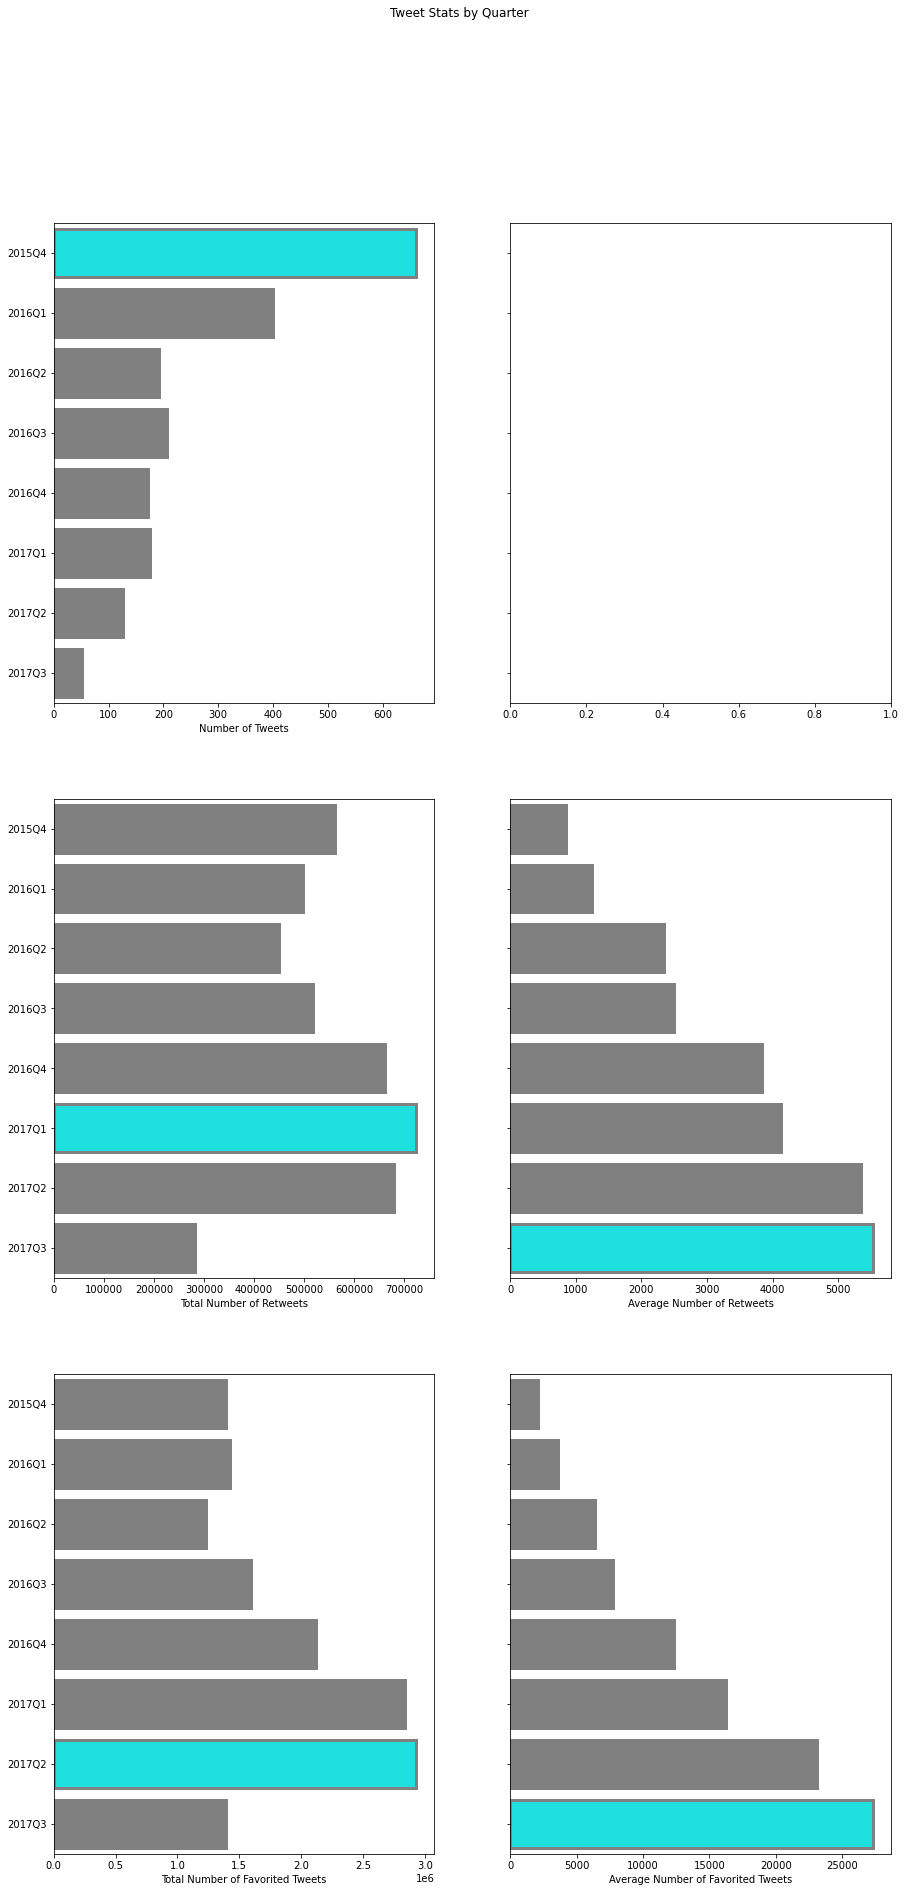

In [292]:
# Plot the different stats by quarter
fig, axes = plt.subplots(3, 2, figsize=(15,30), sharey=True)
fig.suptitle('Tweet Stats by Quarter')

# By number of tweets
tweets_color = ['grey' if (x<max(quarterly_tweets['num_of_tweet'])) else 'cyan' for x in quarterly_tweets['num_of_tweet']]
sns.barplot(ax=axes[0,0], data=quarterly_tweets, x='num_of_tweet', y='quarter', linewidth=3, edgecolor="0.5", palette=tweets_color)
axes[0,0].set(xlabel='Number of Tweets')
axes[0,0].set(ylabel=None)

# By total retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['total_retweet'])) else 'cyan' for x in quarterly_tweets['total_retweet']]
sns.barplot(ax=axes[1,0], data=quarterly_tweets, x='total_retweet', y='quarter', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1,0].set(xlabel='Total Number of Retweets')
axes[1,0].set(ylabel=None)

# By average retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['average_retweet'])) else 'cyan' for x in quarterly_tweets['average_retweet']]
sns.barplot(ax=axes[1,1], data=quarterly_tweets, x='average_retweet', y='quarter', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1,1].set(xlabel='Average Number of Retweets')
axes[1,1].set(ylabel=None)

# By total favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['total_favorited'])) else 'cyan' for x in quarterly_tweets['total_favorited']]
sns.barplot(ax=axes[2,0], data=quarterly_tweets, x='total_favorited', y='quarter', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[2,0].set(xlabel='Total Number of Favorited Tweets')
axes[2,0].set(ylabel=None)

# By average favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['average_favorited'])) else 'cyan' for x in quarterly_tweets['average_favorited']]
sns.barplot(ax=axes[2,1], data=quarterly_tweets, x='average_favorited', y='quarter', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[2,1].set(xlabel='Average Number of Favorited Tweets')
axes[2,1].set(ylabel=None)

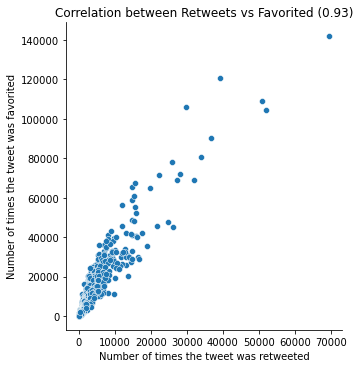

In [293]:
# Let's see the relationship between Retweets and Favorited Tweets
corr=dog_rating_tweets['retweet_count'].corr(dog_rating_tweets['favorite_count'])
sns.relplot(data=dog_rating_tweets, x='retweet_count', y='favorite_count')
plt.xlabel('Number of times the tweet was retweeted')
plt.ylabel('Number of times the tweet was favorited')
plt.title(f'Correlation between Retweets vs Favorited ({round(corr,2)})')
plt.show()


Since retweets and favorited are closely correlated, I picked the number of retweets as the dependent variable in the following analysis of the factors affecting engagements to the WeRateDogs® tweets.

For these analysis I will look at the following factors:
1. Dog related factors:  
    a. Dog Rating  
    b. Dog breed  
2. Tweet related factors:  
    a. Length of tweet text  
    b. Size of image  
3. Time related factors:  
    a. Day of the week  
    b. Time of the day  

In [294]:
# Get the dataframe that includes only the columns to be analysed.
analysis = dog_rating_tweets[['created_at','retweet_count', 'favorite_count','rating_numerator', 'rating_denominator','dog_breed','display_text_range','entities_size_large_w','entities_size_large_h']]

1. Dog related factors

    a. Dog rating

In [295]:
#Check the unique value of rating_denominator
analysis['rating_denominator'].unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2])

In [296]:
#Since rating_denominator is not the same for all we will compute for the rate
analysis['dog_rate']=round(analysis['rating_numerator']/analysis['rating_denominator'],2)

/tmp/ipykernel_302/2080182855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['dog_rate']=round(analysis['rating_numerator']/analysis['rating_denominator'],2)


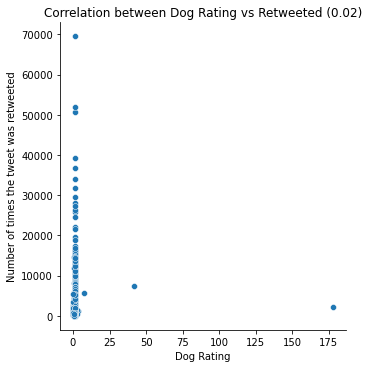

In [297]:
# Let's see the relationship between Dog Rating and Retweet Counts
corr=analysis['dog_rate'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='dog_rate', y='retweet_count')
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Dog Rating vs Retweeted ({round(corr,2)})')
plt.show()

In [298]:
outlier = analysis.groupby('dog_rate')\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['dog_rate'].count(),
        'median_retweet' : x['retweet_count'].median()
    })).sort_values(by='num_of_tweet').reset_index()
outlier

,dog_rate,num_of_tweet,median_retweet
0,177.60,1.0,2233.0
1,7.50,1.0,5622.0
2,3.43,1.0,1306.0
3,2.70,1.0,1466.0
4,2.60,1.0,428.0
5,42.00,1.0,7450.0
6,0.82,1.0,11927.0
7,0.64,1.0,14644.0
8,0.00,2.0,1487.5
9,0.10,4.0,2063.0


In [299]:
# As can be seen in the graph, there are outliers. First we will remove the rates that was only done once
outlier = outlier[outlier['num_of_tweet']==1]['dog_rate']
outlier


0    177.60
1      7.50
2      3.43
3      2.70
4      2.60
5     42.00
6      0.82
7      0.64
Name: dog_rate, dtype: float64

In [300]:
analysis=analysis[~analysis['dog_rate'].isin(outlier)]
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate
0,2017-08-01 16:23:56+00:00,6886,32927,13,10,unknown,86,540,528,1.3
1,2017-08-01 00:17:27+00:00,5185,28468,13,10,chihuahua,139,1407,1600,1.3
2,2017-07-31 00:18:03+00:00,3424,21382,12,10,chihuahua,122,1201,1600,1.2
3,2017-07-30 15:58:51+00:00,7096,35915,13,10,labrador_retriever,80,1201,1600,1.3
4,2017-07-29 16:00:24+00:00,7616,34330,12,10,basset,139,720,540,1.2
...,...,...,...,...,...,...,...,...,...,...
1980,2015-11-16 00:24:50+00:00,36,86,5,10,miniature_pinscher,121,768,1024,0.5
1981,2015-11-16 00:04:52+00:00,113,243,6,10,rhodesian_ridgeback,138,768,1024,0.6
1982,2015-11-15 23:21:54+00:00,35,98,9,10,german_shepherd,131,1024,682,0.9
1983,2015-11-15 23:05:30+00:00,39,111,7,10,redbone,140,768,1024,0.7


In [301]:
# number of tweets and median retweet for each dog rating
analysis.groupby('dog_rate')\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['dog_rate'].count(),
        'median_retweet' : x['retweet_count'].median()
    })).reset_index()

,dog_rate,num_of_tweet,median_retweet
0,0.0,2.0,1487.5
1,0.1,4.0,2063.0
2,0.2,10.0,703.0
3,0.3,19.0,549.0
4,0.4,15.0,784.0
5,0.5,34.0,566.0
6,0.6,32.0,642.0
7,0.7,51.0,511.0
8,0.8,95.0,458.0
9,0.9,151.0,506.0


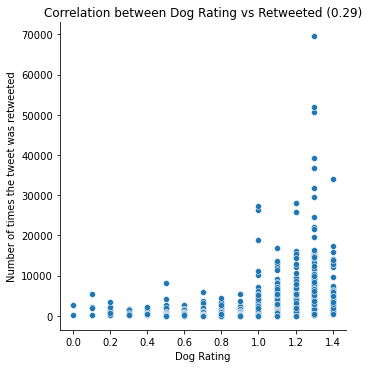

In [302]:
# Let's see the relationship between Dog Rating and Retweet Counts
corr=analysis['dog_rate'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='dog_rate', y='retweet_count')
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Dog Rating vs Retweeted ({round(corr,2)})')
plt.show()

<AxesSubplot:xlabel='dog_rate', ylabel='retweet_count'>

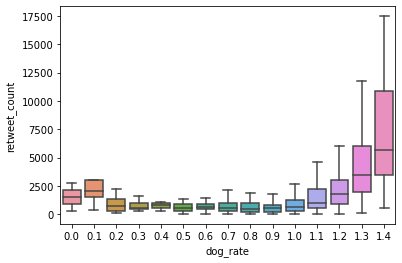

In [303]:
sns.boxplot(data=analysis, x='dog_rate', y='retweet_count', showfliers = False)

    b. Dog Breed

In [304]:
# number of tweet and median retweet for each of the dog breeds
dog_breed=analysis.groupby(['dog_breed']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['dog_breed'].count(),
    'median_retweet': x['retweet_count'].median()
})).sort_values(by='num_of_tweet', ascending=False).reset_index()
dog_breed

,dog_breed,num_of_tweet,median_retweet
0,unknown,306.0,829.5
1,golden_retriever,156.0,1821.5
2,labrador_retriever,105.0,1272.0
3,pembroke,95.0,1554.0
4,chihuahua,90.0,735.0
...,...,...,...
108,bouvier_des_flandres,1.0,3528.0
109,standard_schnauzer,1.0,707.0
110,irish_wolfhound,1.0,644.0
111,silky_terrier,1.0,1470.0


<AxesSubplot:xlabel='num_of_tweet', ylabel='Count'>

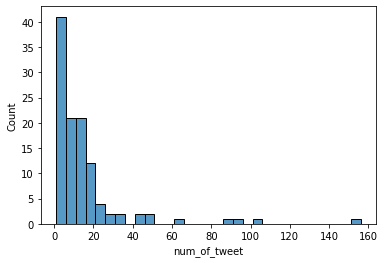

In [305]:
# Removing the unknown and those dog_breeds that tweeted only once
dog_breed_less_unknown = dog_breed[(dog_breed['dog_breed']!='unknown')]
sns.histplot(data=dog_breed_less_unknown, x='num_of_tweet')

In [306]:
# Get the top 10 most twweted dog_breed
dog_breed_most_tweeted = dog_breed_less_unknown.head(10)

[Text(0, 0.5, '')]

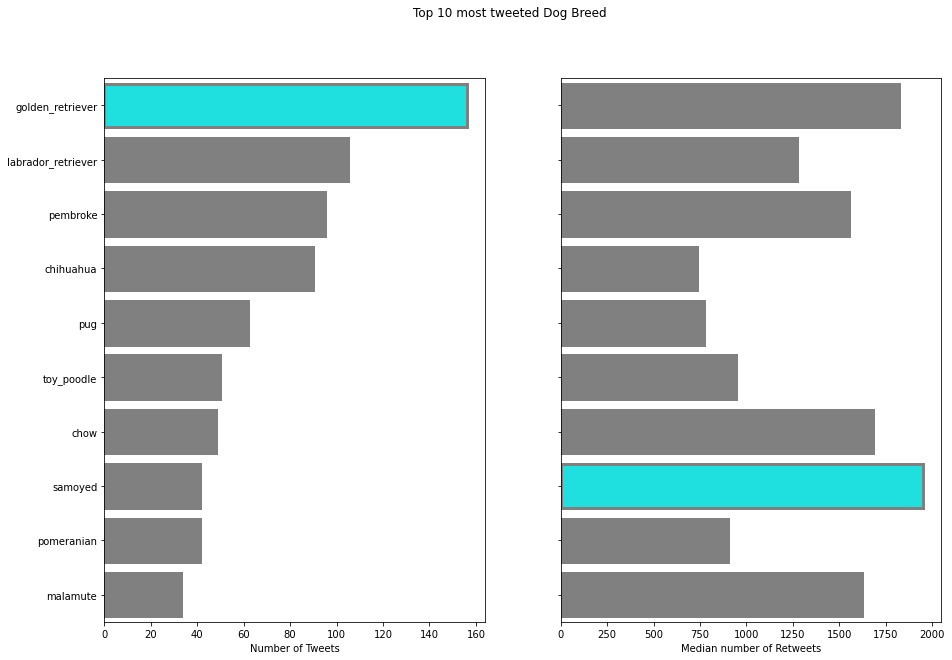

In [307]:
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(15,10), sharey=True)
fig.suptitle('Top 10 most tweeted Dog Breed')

# By number of tweets
tweets_color = ['grey' if (x<max(dog_breed_most_tweeted['num_of_tweet'])) else 'cyan' for x in dog_breed_most_tweeted['num_of_tweet']]
sns.barplot(ax=axes[0], data=dog_breed_most_tweeted, x='num_of_tweet', y='dog_breed', linewidth=3, edgecolor="0.5", palette=tweets_color)
axes[0].set(xlabel='Number of Tweets')
axes[0].set(ylabel=None)

# By average retweets
retweets_color = ['grey' if (x<max(dog_breed_most_tweeted['median_retweet'])) else 'cyan' for x in dog_breed_most_tweeted['median_retweet']]
sns.barplot(ax=axes[1], data=dog_breed_most_tweeted, x='median_retweet', y='dog_breed', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1].set(xlabel='Median number of Retweets')
axes[1].set(ylabel=None)

In [308]:
# classify the dog breeds according to group (based on the UK Kennel Club)
# open the csv file that containts the grouping of breed based on the UKC (https://www.ukcdogs.com/breed-groups)
ukc_dog_group = pd.read_csv('uk_dog_group.csv')
ukc_dog_group.head()

,dog_group,dog_breed
0,companion_dog,Affenpinscher
1,sighthound_&_pariah,Afghan_Hound
2,guardian_dog,Aidi
3,terrier,Airedale_Terrier
4,guardian_dog,Akbash_Dog


In [309]:
# lower case the dog breed
ukc_dog_group['dog_breed']=ukc_dog_group['dog_breed'].apply(lambda x: x.lower())
ukc_dog_group.head()

,dog_group,dog_breed
0,companion_dog,affenpinscher
1,sighthound_&_pariah,afghan_hound
2,guardian_dog,aidi
3,terrier,airedale_terrier
4,guardian_dog,akbash_dog


In [310]:
# join the analysis table to ukc_dog_group
analysis = analysis.merge(ukc_dog_group, on='dog_breed', how='left')
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,dog_group
0,2017-08-01 16:23:56+00:00,6886,32927,13,10,unknown,86,540,528,1.3,NaN
1,2017-08-01 00:17:27+00:00,5185,28468,13,10,chihuahua,139,1407,1600,1.3,companion_dog
2,2017-07-31 00:18:03+00:00,3424,21382,12,10,chihuahua,122,1201,1600,1.2,companion_dog
3,2017-07-30 15:58:51+00:00,7096,35915,13,10,labrador_retriever,80,1201,1600,1.3,sighthound_&_pariah
4,2017-07-29 16:00:24+00:00,7616,34330,12,10,basset,139,720,540,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1972,2015-11-16 00:24:50+00:00,36,86,5,10,miniature_pinscher,121,768,1024,0.5,companion_dog
1973,2015-11-16 00:04:52+00:00,113,243,6,10,rhodesian_ridgeback,138,768,1024,0.6,sighthound_&_pariah
1974,2015-11-15 23:21:54+00:00,35,98,9,10,german_shepherd,131,1024,682,0.9,NaN
1975,2015-11-15 23:05:30+00:00,39,111,7,10,redbone,140,768,1024,0.7,NaN


In [311]:
analysis[analysis['dog_group'].isnull()]['dog_breed'].unique()

array(['unknown', 'basset', 'pembroke', 'mexican_hairless',
       'blenheim_spaniel', 'malamute', 'chow', 'german_shepherd',
       'doberman', 'eskimo_dog', 'german_short-haired_pointer',
       'english_springer', 'flat-coated_retriever', 'cardigan', 'kelpie',
       'bull_mastiff', 'staffordshire_bullterrier', 'boston_bull',
       'black-and-tan_coonhound', 'airedale',
       'american_staffordshire_terrier', 'dandie_dinmont',
       'brittany_spaniel', 'leonberg', 'toy_poodle', 'pekinese', 'cairn',
       'malinois', 'miniature_poodle', 'toy_terrier',
       'wire-haired_fox_terrier', 'walker_hound', 'redbone', 'bluetick',
       'shih-tzu', 'maltese_dog', 'lhasa', 'groenendael',
       'scotch_terrier', 'japanese_spaniel', 'brabancon_griffon'],
      dtype=object)

In [312]:
# Assign the dog breeds that currently have no groups
def get_missing_group(row):
    companion_dog=['japanese_spaniel','lhasa','maltese_dog','miniature_poodle','pekinese','shih-tzu','toy_poodle']
    guardian_dog=['bull_mastiff','doberman','leonberg']
    herding_dog=['cardigan','german_shepherd','pembroke']
    northern_breed=['chow']
    scenthound = ['basset','black-and-tan_coonhound','bluetick','redbone']
    sighthound_pariah = ['brittany_spaniel', 'english_springer','flat-coated_retriever','german_short-haired_pointer']
    terrier = ['airedale','american_staffordshire_terrier','cairn','dandie_dinmont','scotch_terrier','staffordshire_bullterrier','toy_terrier','wire-haired_fox_terrier']
    not_in_ukc = ['blenheim_spaniel','boston_bull','brabancon_griffon','eskimo_dog','groenendael','kelpie','malamute','malinois','mexican_hairless','walker_hound']
    if row['dog_breed'] in companion_dog:
        return 'companion_dog'
    elif row['dog_breed'] in guardian_dog:
        return 'guardian_dog'
    elif row['dog_breed'] in herding_dog:
        return 'herding_dog'
    elif row['dog_breed'] in northern_breed:
        return 'northern_breed'
    elif row['dog_breed'] in scenthound:
        return 'scenthound'
    elif row['dog_breed'] in sighthound_pariah:
        return 'sighthound_&_pariah'
    elif row['dog_breed'] in terrier:
        return 'terrier'
    elif row['dog_breed']=='unknown':
        return 'unknown'
    elif row['dog_breed'] in not_in_ukc:
            return 'not_in_ukc'
    else:
        return row['dog_group']



In [313]:
analysis['dog_group']=analysis.apply(lambda row: get_missing_group(row), axis=1)
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1976
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   created_at             1977 non-null   datetime64[ns, UTC]
 1   retweet_count          1977 non-null   int64              
 2   favorite_count         1977 non-null   int64              
 3   rating_numerator       1977 non-null   int64              
 4   rating_denominator     1977 non-null   int64              
 5   dog_breed              1977 non-null   object             
 6   display_text_range     1977 non-null   int64              
 7   entities_size_large_w  1977 non-null   int64              
 8   entities_size_large_h  1977 non-null   int64              
 9   dog_rate               1977 non-null   float64            
 10  dog_group              1977 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(7), object(

In [314]:
# Check the number of tweets and median retweets for each dog_group
dog_group =analysis.groupby(['dog_group']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['dog_group'].count(),
    'average_retweet': x['retweet_count'].mean(),
    'median_retweet': x['retweet_count'].median()
})).sort_values(by='median_retweet', ascending=False).reset_index()
dog_group

,dog_group,num_of_tweet,average_retweet,median_retweet
0,northern_breed,124.0,2594.887097,1676.0
1,herding_dog,198.0,2295.338384,1433.0
2,sighthound_&_pariah,464.0,2732.228448,1365.0
3,not_in_ukc,117.0,2406.461538,1107.0
4,guardian_dog,133.0,1817.902256,1101.0
5,scenthound,56.0,1615.517857,967.0
6,terrier,151.0,1792.688742,874.0
7,companion_dog,428.0,1864.186916,855.0
8,unknown,306.0,1970.839869,829.5


In [315]:
order = dog_group['dog_group']

<AxesSubplot:xlabel='dog_group', ylabel='retweet_count'>

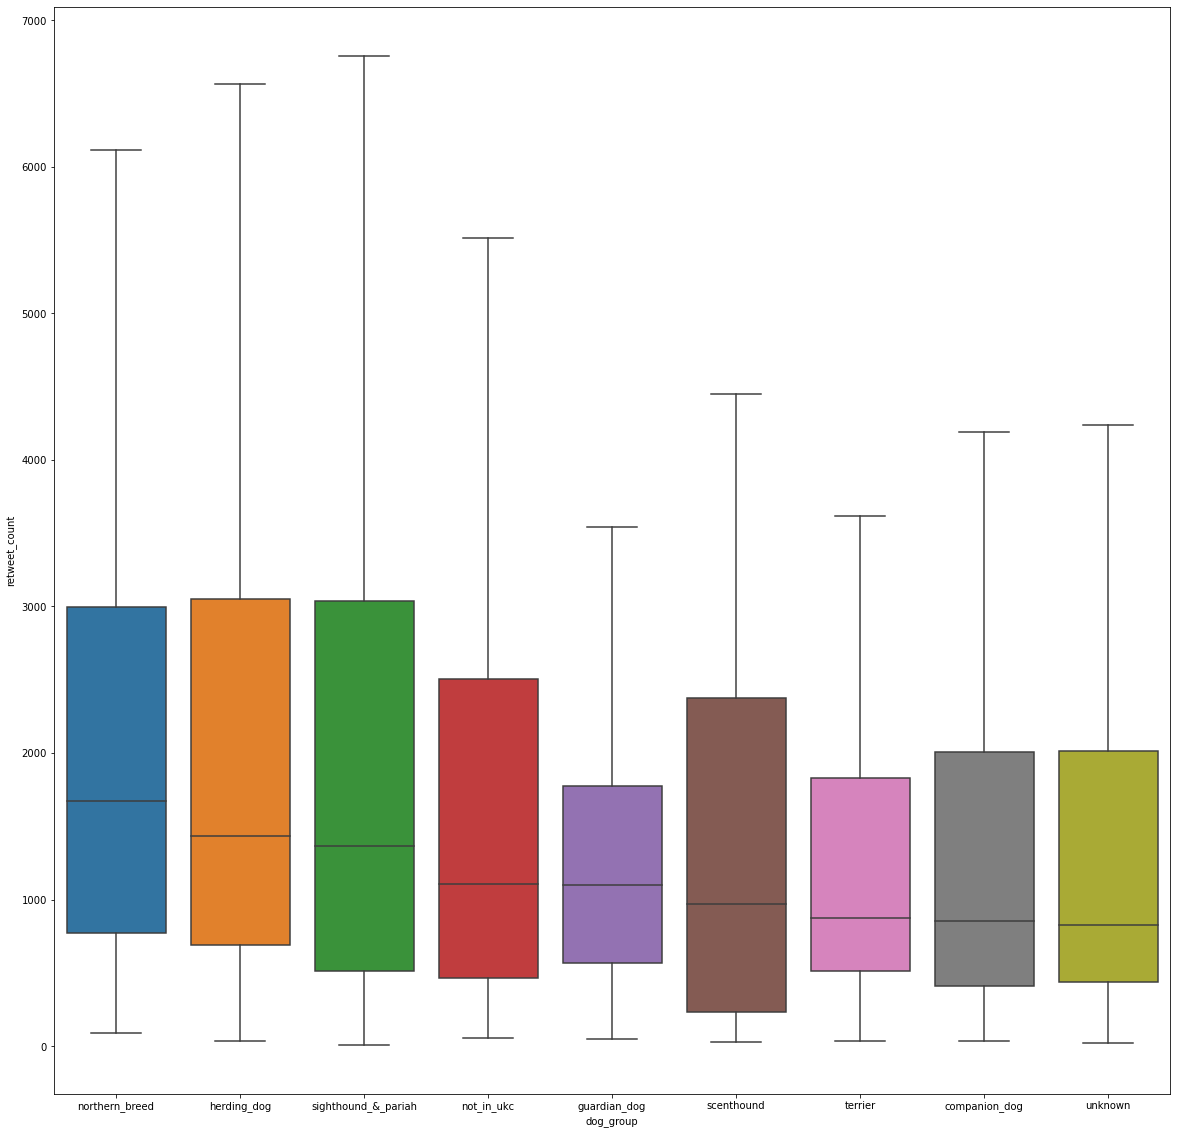

In [316]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=analysis, x='dog_group', y='retweet_count', showfliers = False, order=order)

2. Tweet related factors:

    a. Length of tweet text

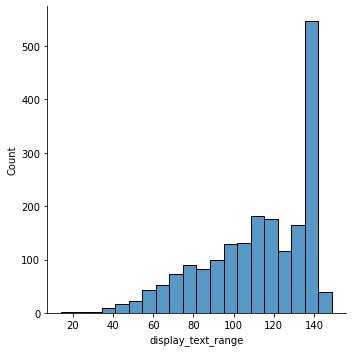

In [317]:
sns.displot(data=analysis, x='display_text_range')

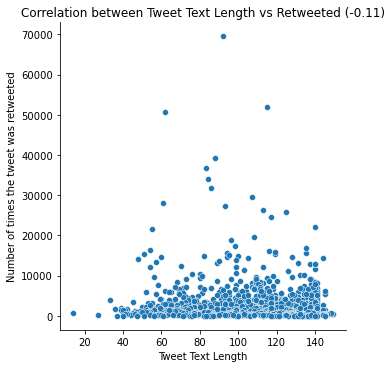

In [318]:
# Let's see the relationship between Length of Texts and Retweet Counts
corr=analysis['display_text_range'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='display_text_range', y='retweet_count')
plt.xlabel('Tweet Text Length')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Tweet Text Length vs Retweeted ({round(corr,2)})')
plt.show()

    b. Size of Image

In [319]:
# Number of tweets and median retweet by image size
analysis['size'] = analysis['entities_size_large_w']*analysis['entities_size_large_h']
analysis.groupby(['size']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['dog_group'].count(),
    'median_retweet': x['retweet_count'].median()
})).sort_values(by='num_of_tweet', ascending=False).reset_index()

,size,num_of_tweet,median_retweet
0,786432,421.0,839.0
1,589824,154.0,679.0
2,3145728,119.0,2563.0
3,1048576,79.0,810.0
4,1921600,47.0,3654.0
...,...,...,...
711,442559,1.0,966.0
712,445444,1.0,245.0
713,447760,1.0,450.0
714,448224,1.0,509.0


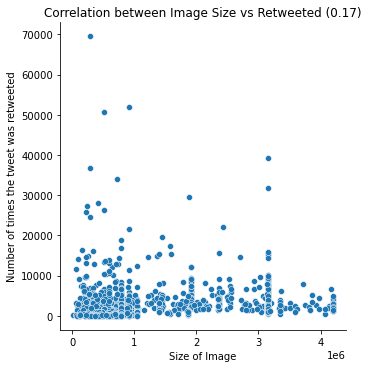

In [320]:
# Let's see the relationship between Size and Retweet Counts
corr=analysis['size'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='size', y='retweet_count')
plt.xlabel('Size of Image')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Image Size vs Retweeted ({round(corr,2)})')
plt.show()

3. Time Related Factors

    a. Day of the Week

In [321]:
# Add the day of the week from the created_at column
analysis['week_day'] = analysis['created_at'].apply(lambda x: x.strftime('%A'))
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,dog_group,size,week_day
0,2017-08-01 16:23:56+00:00,6886,32927,13,10,unknown,86,540,528,1.3,unknown,285120,Tuesday
1,2017-08-01 00:17:27+00:00,5185,28468,13,10,chihuahua,139,1407,1600,1.3,companion_dog,2251200,Tuesday
2,2017-07-31 00:18:03+00:00,3424,21382,12,10,chihuahua,122,1201,1600,1.2,companion_dog,1921600,Monday
3,2017-07-30 15:58:51+00:00,7096,35915,13,10,labrador_retriever,80,1201,1600,1.3,sighthound_&_pariah,1921600,Sunday
4,2017-07-29 16:00:24+00:00,7616,34330,12,10,basset,139,720,540,1.2,scenthound,388800,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2015-11-16 00:24:50+00:00,36,86,5,10,miniature_pinscher,121,768,1024,0.5,companion_dog,786432,Monday
1973,2015-11-16 00:04:52+00:00,113,243,6,10,rhodesian_ridgeback,138,768,1024,0.6,sighthound_&_pariah,786432,Monday
1974,2015-11-15 23:21:54+00:00,35,98,9,10,german_shepherd,131,1024,682,0.9,herding_dog,698368,Sunday
1975,2015-11-15 23:05:30+00:00,39,111,7,10,redbone,140,768,1024,0.7,scenthound,786432,Sunday


In [322]:
# Number of tweets by day of the week
analysis.groupby(['week_day'])['week_day'].count().sort_values(ascending=False)

week_day
Monday       324
Wednesday    294
Tuesday      293
Thursday     280
Friday       279
Sunday       255
Saturday     252
Name: week_day, dtype: int64

<AxesSubplot:xlabel='week_day', ylabel='retweet_count'>

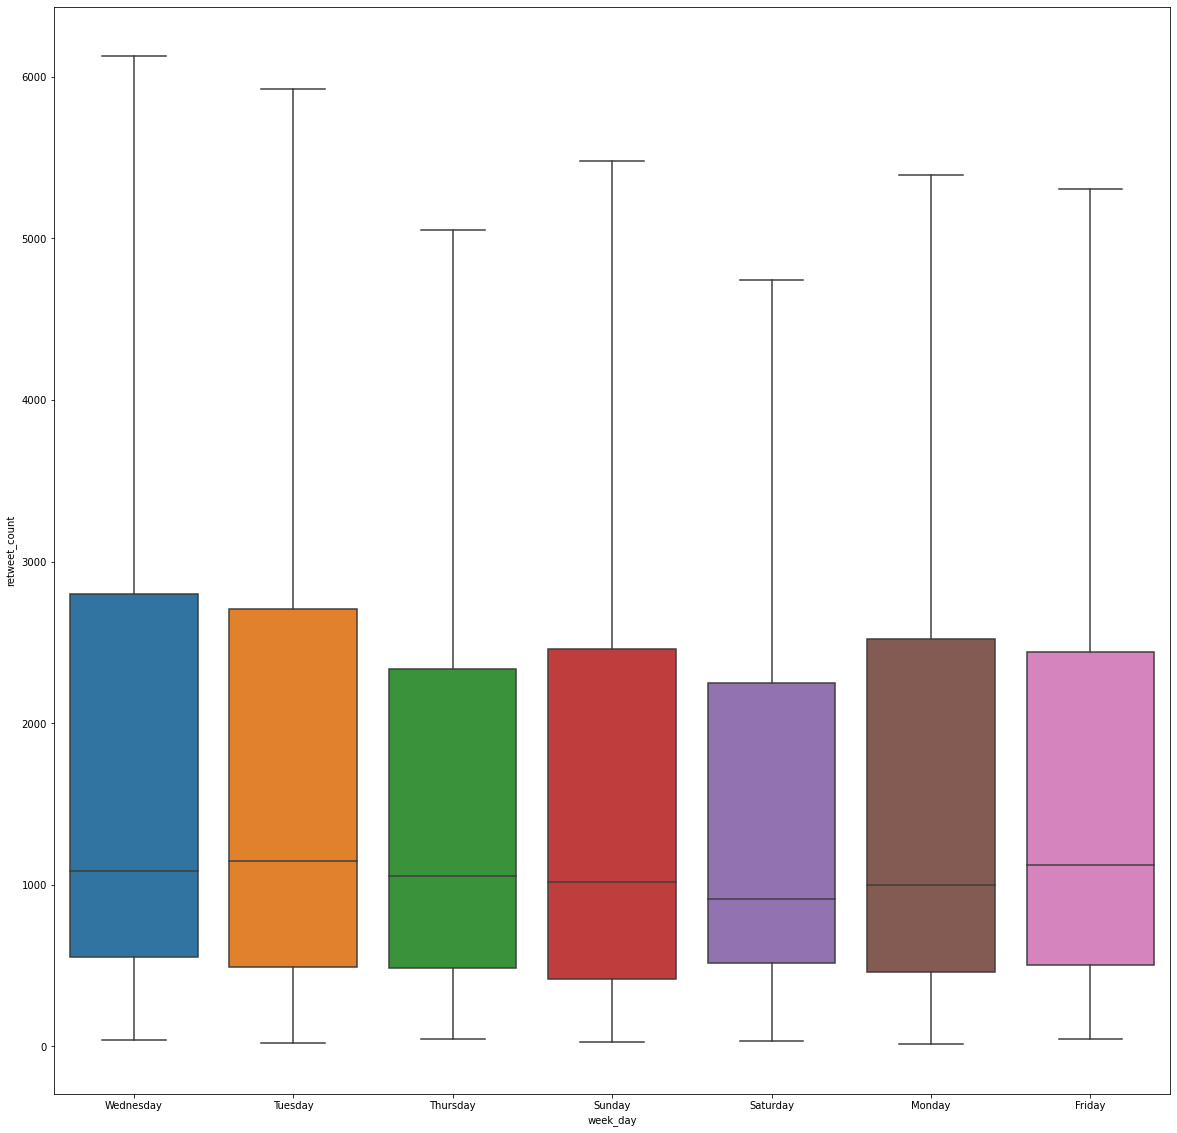

In [323]:
order = analysis.groupby(['week_day'])['retweet_count'].median().iloc[::-1].index
plt.figure(figsize=(20, 20))
sns.boxplot(data=analysis, x='week_day', y='retweet_count', showfliers = False, order=order)

    b. Hour of the Day

In [324]:
# Create the hour of day based on the created_at column
analysis['hour_of_day'] = analysis['created_at'].apply(lambda x: x.strftime('%H'))
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,dog_group,size,week_day,hour_of_day
0,2017-08-01 16:23:56+00:00,6886,32927,13,10,unknown,86,540,528,1.3,unknown,285120,Tuesday,16
1,2017-08-01 00:17:27+00:00,5185,28468,13,10,chihuahua,139,1407,1600,1.3,companion_dog,2251200,Tuesday,00
2,2017-07-31 00:18:03+00:00,3424,21382,12,10,chihuahua,122,1201,1600,1.2,companion_dog,1921600,Monday,00
3,2017-07-30 15:58:51+00:00,7096,35915,13,10,labrador_retriever,80,1201,1600,1.3,sighthound_&_pariah,1921600,Sunday,15
4,2017-07-29 16:00:24+00:00,7616,34330,12,10,basset,139,720,540,1.2,scenthound,388800,Saturday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2015-11-16 00:24:50+00:00,36,86,5,10,miniature_pinscher,121,768,1024,0.5,companion_dog,786432,Monday,00
1973,2015-11-16 00:04:52+00:00,113,243,6,10,rhodesian_ridgeback,138,768,1024,0.6,sighthound_&_pariah,786432,Monday,00
1974,2015-11-15 23:21:54+00:00,35,98,9,10,german_shepherd,131,1024,682,0.9,herding_dog,698368,Sunday,23
1975,2015-11-15 23:05:30+00:00,39,111,7,10,redbone,140,768,1024,0.7,scenthound,786432,Sunday,23


In [325]:
hour=analysis.groupby(['hour_of_day']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['hour_of_day'].count(),
    'median_retweet': x['retweet_count'].median()
})).reset_index()
hour

,hour_of_day,num_of_tweet,median_retweet
0,00,251.0,1814.0
1,01,274.0,1106.5
2,02,209.0,632.0
3,03,170.0,641.0
4,04,96.0,544.0
5,05,25.0,644.0
6,06,3.0,1757.0
7,13,1.0,318.0
8,14,8.0,770.5
9,15,90.0,1501.0


In [326]:
# Since there are missing hours we coul add them
dict_missing_hours = {'hour_of_day': ['07', '08', '09', '10', '11', '13'],
                     'num_of_tweet': [0, 0, 0, 0, 0, 0]}
missing_hours = pd.DataFrame(dict_missing_hours)
hour = hour.append(missing_hours, ignore_index =True)
hour = hour.sort_values(by='hour_of_day')

Text(0, 0.5, 'Number of Tweet')

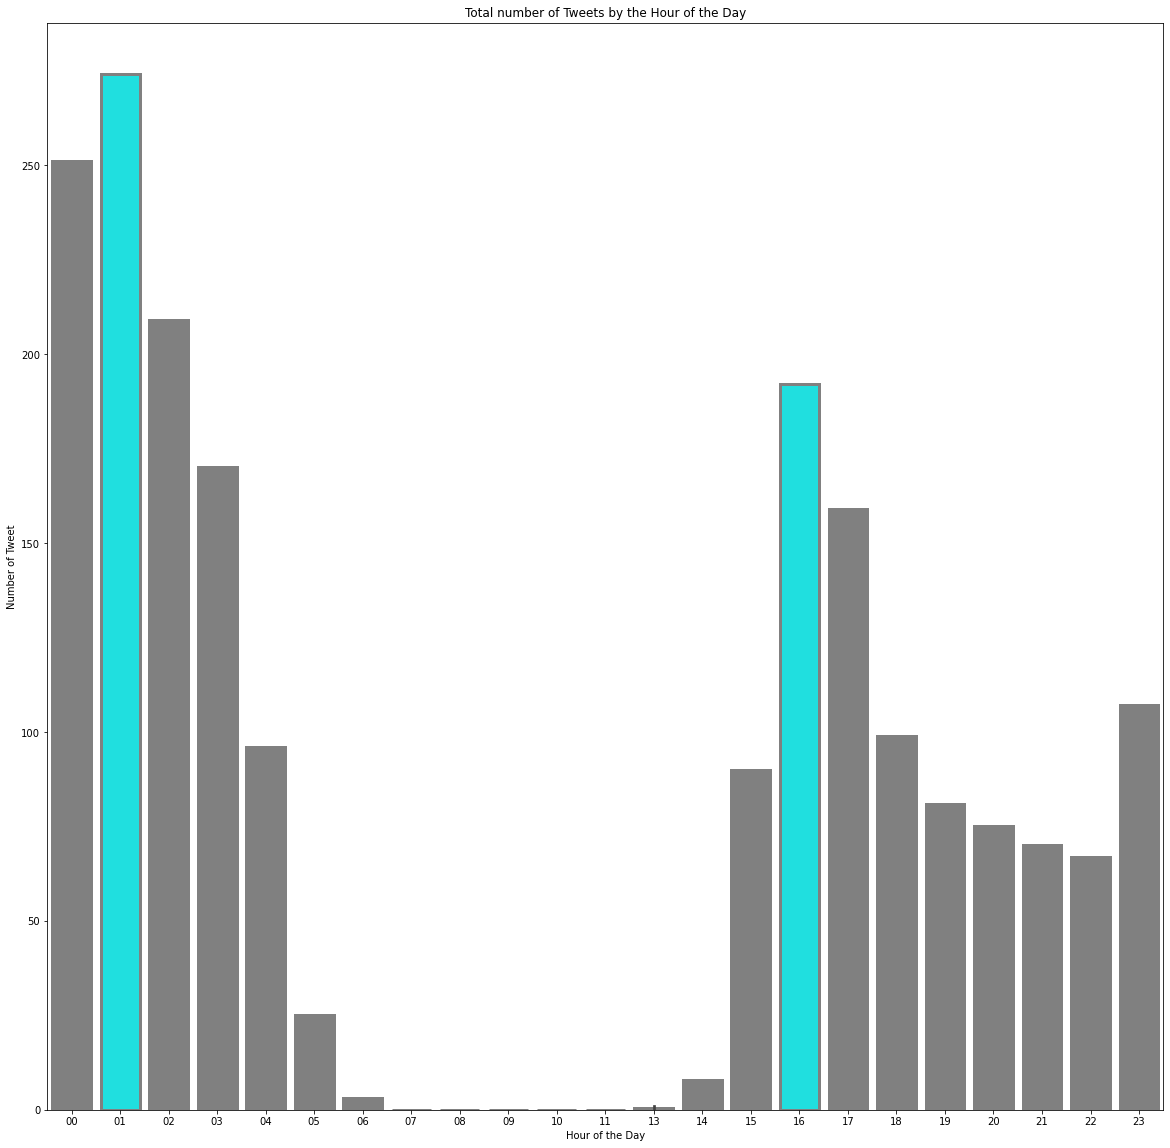

In [327]:
#Graph the number of tweets by the hour
plt.figure(figsize=(20, 20))
tweets_color = ['cyan' if (x in ['01', '15']) else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour, x='hour_of_day', y='num_of_tweet', linewidth=3, edgecolor="0.5", palette=tweets_color)
plt.title('Total number of Tweets by the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweet')

In [328]:
max(hour['median_retweet'])

2278.0

Text(0, 0.5, 'Median Number of Retweet')

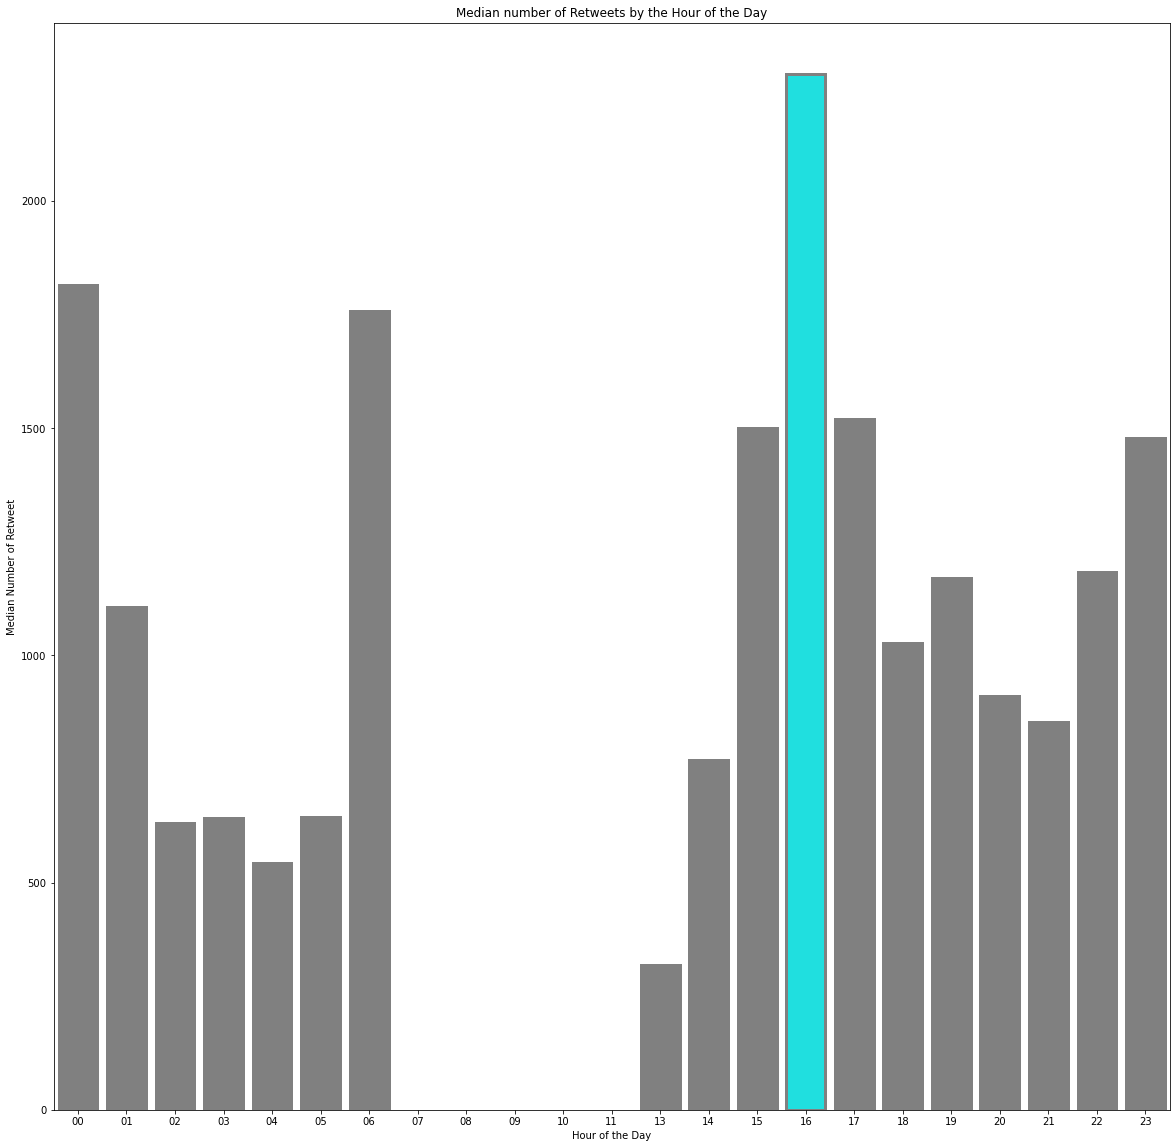

In [329]:
#Graph the median number of retweets by the hour
plt.figure(figsize=(20, 20))
retweets_color = ['cyan' if (x=='15') else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour, x='hour_of_day', y='median_retweet', linewidth=3, edgecolor="0.5", palette=retweets_color)
plt.title('Median number of Retweets by the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Median Number of Retweet')

### Insights:
1. WeRateDogs® had posted the most tweets in the first quarter since they created their accounts and since decreased the rate of their posts. Though their number of tweets per quarter had decreased the number of times that their tweets are retweeted and favorited are increasing.

2. Dog rating is directly proportional to the number of retweets

3. Golden retriever images is the most number of tweets but Samoyed images have the highest median number of retweets among the top 10 most tweeted dog breed

4. With the dog groups, northern breeds, herding dogs and sighthound group have the highest median number of retweets

5. There is a slight negative relationship between the length of text and number of retweets while the size of image have a positive correlation to the number of retweets.

6. Most tweets are sent on Mondays and Saturday has the least but the number of retweets is similar among the different days.

7. In terms of number of time tweets are being sent out, there are two peaks. One at 0100 and another at 1600. Tweets sent at 1600 has the highest median number of retweets


### Visualization

In [330]:
def define_dog_group(x):
    if x in ['northern_breed', 'herding_dog', 'sighthound_&_pariah']:
        return 'Highest median number of retweets'
    else:
        return 'Others'
analysis['high_retweet_dog_group'] = analysis['dog_group'].apply(lambda x: define_dog_group(x))

In [331]:
def define_hour(x):
    if x == '16':
        return 'Yes'
    else:
        return 'No'
analysis['hour_1600'] = analysis['hour_of_day'].apply(lambda x: define_hour(x))

<Figure size 6480x360 with 0 Axes>

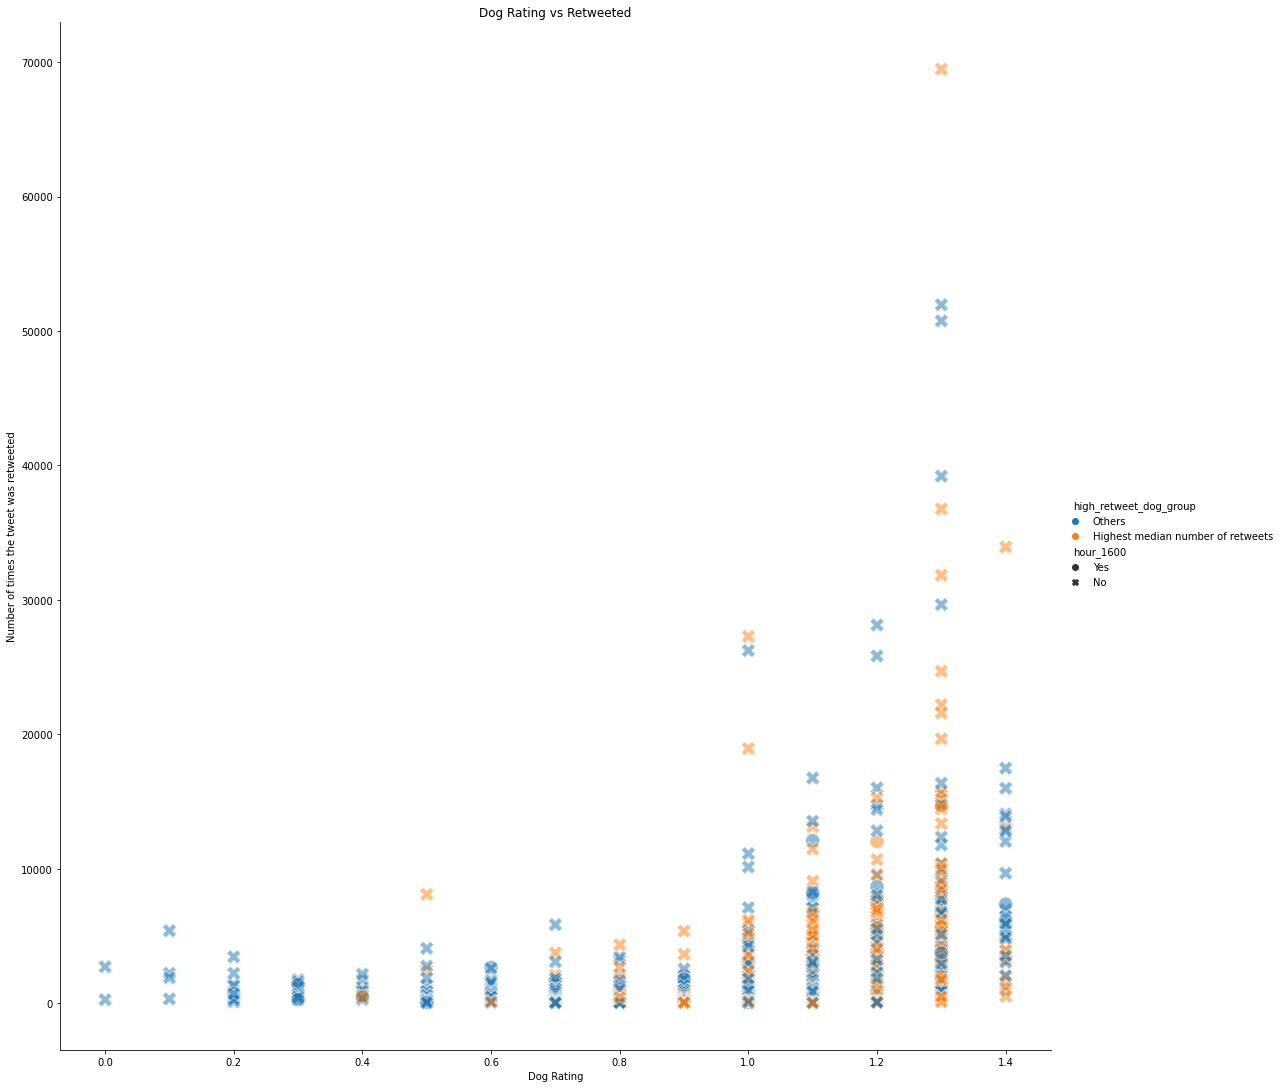

In [332]:
plt.figure(figsize=(90, 5))
sns.relplot(data=analysis, x='dog_rate', y='retweet_count', hue = 'high_retweet_dog_group', style='hour_1600', legend=True, height=15, s=200, alpha=0.5)
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title('Dog Rating vs Retweeted')
plt.show()

In [333]:
analysis.head()

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,dog_group,size,week_day,hour_of_day,high_retweet_dog_group,hour_1600
0,2017-08-01 16:23:56+00:00,6886,32927,13,10,unknown,86,540,528,1.3,unknown,285120,Tuesday,16,Others,Yes
1,2017-08-01 00:17:27+00:00,5185,28468,13,10,chihuahua,139,1407,1600,1.3,companion_dog,2251200,Tuesday,00,Others,No
2,2017-07-31 00:18:03+00:00,3424,21382,12,10,chihuahua,122,1201,1600,1.2,companion_dog,1921600,Monday,00,Others,No
3,2017-07-30 15:58:51+00:00,7096,35915,13,10,labrador_retriever,80,1201,1600,1.3,sighthound_&_pariah,1921600,Sunday,15,Highest median number of retweets,No
4,2017-07-29 16:00:24+00:00,7616,34330,12,10,basset,139,720,540,1.2,scenthound,388800,Saturday,16,Others,Yes
